# Importing packages and datasets:

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:100%!important;width:auto!important;}</style>"))

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
import seaborn as sns

import pandas_bokeh
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Spectral6
from bokeh.layouts import row


output_notebook()

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import neighbors

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

%matplotlib inline
sns.set()


Loading BokehJS ...

Using TensorFlow backend.


### Importing Currency exchange rates dataset:

In [4]:
df1 = pd.read_csv("C:/Users/johns/desktop/AI/dataset with factors.csv")
df1

Date  USD:US Dollar  AUD:Australian Dollar  CAD:Canadian Dollar  \
0     01/01/2000            1.0                    NaN                  NaN   
1     02/01/2000            1.0                    NaN                  NaN   
2     03/01/2000            1.0               1.520912             1.444698   
3     04/01/2000            1.0               1.521300             1.449393   
4     05/01/2000            1.0               1.521316             1.453029   
...          ...            ...                    ...                  ...   
7300  27/12/2019            1.0               1.434233             1.308348   
7301  28/12/2019            NaN                    NaN                  NaN   
7302  29/12/2019            NaN                    NaN                  NaN   
7303  30/12/2019            1.0               1.429261             1.306730   
7304  31/12/2019            1.0               1.423803             1.299448   

      CHF:Swiss Franc  GBP:Pound Sterling  JPY:Japanese Yen  \
0                 NaN                 NaN               NaN   
1                 NaN                 NaN               NaN   
2            1.589990            0.619029        101.833499   
3            1.557787            0.610966        102.746240   
4            1.548997            0.609954        103.530093   
...               ...                 ...               ...   
7300         0.976419            0.763292        109.593831   
7301              NaN                 NaN               NaN   
7302              NaN                 NaN               NaN   
7303         0.971579            0.761534        109.205470   
7304         0.966174            0.757344        108.545487   

      NZD:New Zealand Dollar  EUR:Euro  
0                        NaN       NaN  
1                        NaN       NaN  
2                   1.915857  0.991080  
3                   1.916060  0.970403  
4                   1.924769  0.964506  
...                      ...       ...  
7300                1.493320  0.896620  
7301                     NaN       NaN  
7302                     NaN       NaN  
7303                1.486996  0.893735  
7304                1.482375  0.890155  

[7305 rows x 9 columns]

### Importing factors influencing FOREX rates dataset :

In [5]:
df2 = pd.read_csv("C:/Users/johns/desktop/AI/FOREX factors.csv")
df2

Date  Goldprices      Debt        GDP      CPI    PPI
0     03/01/2000       100.9   5773392  10002.857  169.300  128.3
1     04/01/2000        97.8   5773392  10002.857  169.300  128.3
2     05/01/2000        97.5   5773392  10002.857  169.300  128.3
3     06/01/2000        97.1   5773392  10002.857  169.300  128.3
4     07/01/2000        98.0   5773392  10002.857  169.300  128.3
...          ...         ...       ...        ...      ...    ...
5212  25/12/2019       515.0  23201380  21729.124  258.444  199.0
5213  26/12/2019       515.0  23201380  21729.124  258.444  199.0
5214  27/12/2019       525.2  23201380  21729.124  258.444  199.0
5215  30/12/2019       526.3  23201380  21729.124  258.444  199.0
5216  31/12/2019       526.3  23201380  21729.124  258.444  199.0

[5217 rows x 6 columns]

### Importing US natural disaster dataset:

In [6]:
df3 = pd.read_csv("C:/Users/johns/downloads/events-US-1980-2020.csv")
df3

Name          Disaster  \
0     Southern Severe Storms and Flooding (April 1980)          Flooding   
1                        Hurricane Allen (August 1980)  Tropical Cyclone   
2    Central/Eastern Drought/Heatwave (Summer-Fall ...           Drought   
3                        Florida Freeze (January 1981)            Freeze   
4    Severe Storms, Flash Floods, Hail, Tornadoes (...      Severe Storm   
..                                                 ...               ...   
260             Tropical Storm Imelda (September 2019)  Tropical Cyclone   
261  Texas Tornadoes and Central Severe Weather (Oc...      Severe Storm   
262  California and Alaska Wildfires (Summer-Fall 2...          Wildfire   
263  Southeastern Tornadoes and Northern Storms and...      Severe Storm   
264  Tennessee Tornadoes and Southeastern Severe We...      Severe Storm   

     Begin Date    End Date  Damage Cost (Millions of Dollars)  Deaths  
0    1980-04-10  1980-04-17                             2346.4       7  
1    1980-08-07  1980-08-11                             1958.8      13  
2    1980-06-01  1980-11-30                            33266.4    1260  
3    1981-01-12  1981-01-14                             1698.8       0  
4    1981-05-05  1981-05-10                             1192.4      20  
..          ...         ...                                ...     ...  
260  2019-09-17  2019-09-21                             5050.0       5  
261  2019-10-20  2019-10-20                             1735.2       2  
262  2019-06-01  2019-11-30                             4545.0       3  
263  2020-01-10  2020-01-12                             1100.0      10  
264  2020-03-02  2020-03-04                             1137.0      25  

[265 rows x 6 columns]

# Data Wrangling:

### Cleaning Currency exchange rates dataset:

In [7]:
df1.shape, df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    7305 non-null   object 
 1   USD:US Dollar           6976 non-null   float64
 2   AUD:Australian Dollar   5116 non-null   float64
 3   CAD:Canadian Dollar     5116 non-null   float64
 4   CHF:Swiss Franc         5116 non-null   float64
 5   GBP:Pound Sterling      5116 non-null   float64
 6   JPY:Japanese Yen        5116 non-null   float64
 7   NZD:New Zealand Dollar  5116 non-null   float64
 8   EUR:Euro                5116 non-null   float64
dtypes: float64(8), object(1)
memory usage: 513.8+ KB


((7305, 9), None)

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'], format = "%d/%m/%Y")

In [9]:
# Converting date column from object data type to date data type
# Creating a new column to know the day of the provided date
# Removing the weekend data as it is mostly null 

df1['day_of_week'] = df1['Date'].dt.day_name()
df1 = df1[~df1['day_of_week'].isin(['Saturday', 'Sunday'])]


In [10]:
df1.isnull().sum().sum()

724

In [11]:
df1=df1.interpolate(method ='linear', limit_direction ='both')

In [12]:
df1.head(20)

Date  USD:US Dollar  AUD:Australian Dollar  CAD:Canadian Dollar  \
2  2000-01-03            1.0               1.520912             1.444698   
3  2000-01-04            1.0               1.521300             1.449393   
4  2000-01-05            1.0               1.521316             1.453029   
5  2000-01-06            1.0               1.523681             1.452734   
6  2000-01-07            1.0               1.530338             1.459549   
9  2000-01-10            1.0               1.523805             1.454003   
10 2000-01-11            1.0               1.527301             1.458951   
11 2000-01-12            1.0               1.518529             1.456830   
12 2000-01-13            1.0               1.503503             1.449689   
13 2000-01-14            1.0               1.499462             1.449291   
16 2000-01-17            1.0               1.507034             1.451456   
17 2000-01-18            1.0               1.508174             1.449123   
18 2000-01-19            1.0               1.506383             1.449480   
19 2000-01-20            1.0               1.504807             1.449599   
20 2000-01-21            1.0               1.506883             1.446667   
23 2000-01-24            1.0               1.525381             1.442106   
24 2000-01-25            1.0               1.526279             1.443245   
25 2000-01-26            1.0               1.525302             1.437768   
26 2000-01-27            1.0               1.532578             1.436548   
27 2000-01-28            1.0               1.541227             1.439683   

    CHF:Swiss Franc  GBP:Pound Sterling  JPY:Japanese Yen  \
2          1.589990            0.619029        101.833499   
3          1.557787            0.610966        102.746240   
4          1.548997            0.609954        103.530093   
5          1.546785            0.606662        104.659222   
6          1.563497            0.608907        105.105018   
9          1.572881            0.610910        104.858735   
10         1.569130            0.609497        106.132995   
11         1.561700            0.606616        105.840124   
12         1.567828            0.608700        105.965356   
13         1.577506            0.608411        105.672372   
16         1.598573            0.612245        104.824648   
17         1.598236            0.611711        105.439413   
18         1.595250            0.610787        105.878278   
19         1.600456            0.607295        105.501041   
20         1.594731            0.605427        104.516193   
23         1.609255            0.604568        105.255809   
24         1.610811            0.607814        105.605516   
25         1.608544            0.608244        105.838906   
26         1.615176            0.610365        105.683641   
27         1.636982            0.614439        105.341186   

    NZD:New Zealand Dollar  EUR:Euro day_of_week  
2                 1.915857  0.991080      Monday  
3                 1.916060  0.970403     Tuesday  
4                 1.924769  0.964506   Wednesday  
5                 1.931459  0.962649    Thursday  
6                 1.939129  0.972384      Friday  
9                 1.934011  0.977613      Monday  
10                1.937012  0.975039     Tuesday  
11                1.928793  0.970120   Wednesday  
12                1.911736  0.973141    Thursday  
13                1.916381  0.977995      Friday  
16                1.928869  0.990688      Monday  
17                1.936491  0.990786     Tuesday  
18                1.935972  0.989609   Wednesday  
19                1.939736  0.991179    Thursday  
20                1.943449  0.990393      Friday  
23                1.972175  0.997307      Monday  
24                1.959632  0.999201     Tuesday  
25                1.967063  0.998104   Wednesday  
26                1.964615  1.002406    Thursday  
27                2.022746  1.015435      Friday

In [13]:
df1.isnull().sum()

Date                      0
USD:US Dollar             0
AUD:Australian Dollar     0
CAD:Canadian Dollar       0
CHF:Swiss Franc           0
GBP:Pound Sterling        0
JPY:Japanese Yen          0
NZD:New Zealand Dollar    0
EUR:Euro                  0
day_of_week               0
dtype: int64

### Cleaning FOREX factors dataset:

In [14]:
df2['Date'] = pd.to_datetime(df2['Date'], format = "%d/%m/%Y")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5217 non-null   datetime64[ns]
 1   Goldprices  5217 non-null   float64       
 2   Debt        5217 non-null   int64         
 3   GDP         5217 non-null   float64       
 4   CPI         5217 non-null   float64       
 5   PPI         5217 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 244.7 KB


### Merging currency exchange rates dataset and FOREX factors datasets:

In [15]:
forex_df = pd.merge(df1,df2, how = 'outer', on = "Date")
forex_df

Date  USD:US Dollar  AUD:Australian Dollar  CAD:Canadian Dollar  \
0    2000-01-03            1.0               1.520912             1.444698   
1    2000-01-04            1.0               1.521300             1.449393   
2    2000-01-05            1.0               1.521316             1.453029   
3    2000-01-06            1.0               1.523681             1.452734   
4    2000-01-07            1.0               1.530338             1.459549   
...         ...            ...                    ...                  ...   
5212 2019-12-25            1.0               1.441916             1.313493   
5213 2019-12-26            1.0               1.438075             1.310920   
5214 2019-12-27            1.0               1.434233             1.308348   
5215 2019-12-30            1.0               1.429261             1.306730   
5216 2019-12-31            1.0               1.423803             1.299448   

      CHF:Swiss Franc  GBP:Pound Sterling  JPY:Japanese Yen  \
0            1.589990            0.619029        101.833499   
1            1.557787            0.610966        102.746240   
2            1.548997            0.609954        103.530093   
3            1.546785            0.606662        104.659222   
4            1.563497            0.608907        105.105018   
...               ...                 ...               ...   
5212         0.979986            0.769069        109.449448   
5213         0.978202            0.766181        109.521639   
5214         0.976419            0.763292        109.593831   
5215         0.971579            0.761534        109.205470   
5216         0.966174            0.757344        108.545487   

      NZD:New Zealand Dollar  EUR:Euro day_of_week  Goldprices      Debt  \
0                   1.915857  0.991080      Monday       100.9   5773392   
1                   1.916060  0.970403     Tuesday        97.8   5773392   
2                   1.924769  0.964506   Wednesday        97.5   5773392   
3                   1.931459  0.962649    Thursday        97.1   5773392   
4                   1.939129  0.972384      Friday        98.0   5773392   
...                      ...       ...         ...         ...       ...   
5212                1.503549  0.900558   Wednesday       515.0  23201380   
5213                1.498435  0.898589    Thursday       515.0  23201380   
5214                1.493320  0.896620      Friday       525.2  23201380   
5215                1.486996  0.893735      Monday       526.3  23201380   
5216                1.482375  0.890155     Tuesday       526.3  23201380   

            GDP      CPI    PPI  
0     10002.857  169.300  128.3  
1     10002.857  169.300  128.3  
2     10002.857  169.300  128.3  
3     10002.857  169.300  128.3  
4     10002.857  169.300  128.3  
...         ...      ...    ...  
5212  21729.124  258.444  199.0  
5213  21729.124  258.444  199.0  
5214  21729.124  258.444  199.0  
5215  21729.124  258.444  199.0  
5216  21729.124  258.444  199.0  

[5217 rows x 15 columns]

In [16]:
forex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    5217 non-null   datetime64[ns]
 1   USD:US Dollar           5217 non-null   float64       
 2   AUD:Australian Dollar   5217 non-null   float64       
 3   CAD:Canadian Dollar     5217 non-null   float64       
 4   CHF:Swiss Franc         5217 non-null   float64       
 5   GBP:Pound Sterling      5217 non-null   float64       
 6   JPY:Japanese Yen        5217 non-null   float64       
 7   NZD:New Zealand Dollar  5217 non-null   float64       
 8   EUR:Euro                5217 non-null   float64       
 9   day_of_week             5217 non-null   object        
 10  Goldprices              5217 non-null   float64       
 11  Debt                    5217 non-null   int64         
 12  GDP                     5217 non-null   float64 

In [17]:
forex_df.to_csv(r'C:/users/johns/desktop/AI/actual_dataset.csv')

### Cleaning US natural disaster dataset:

In [18]:
df3.drop(['End Date'], axis=1)
df3['Begin Date'] = pd.to_datetime(df3['Begin Date'],format='%Y-%m-%d').dt.date.astype('datetime64[s]')

### Merging US Natural disater dataset with FOREX dataset:

In [19]:
df3 = df3.rename({'Begin Date' : 'Date'}, axis = 1)

disaster_df = pd.merge(forex_df,df3 , how = 'left', on = "Date")

### Cleaning the final FOREX dataset:

In [20]:
disaster_df['disaster_event'] = disaster_df['Disaster']
disaster_df['disaster_event'].loc[~disaster_df['disaster_event'].isnull()] = 1  # not nan
disaster_df['disaster_event'].loc[disaster_df['disaster_event'].isnull()] = 0  # nan
disaster_df['Damage Cost (Millions of Dollars)'].loc[disaster_df['Damage Cost (Millions of Dollars)'].isnull()] = 0  # nan
disaster_df['Deaths'].loc[disaster_df['Deaths'].isnull()] = 0  # nan
disaster_df['Disaster'].fillna("No disaster", inplace = True)
disaster_df['Name'].fillna("No disaster", inplace = True)

disaster_df = disaster_df[['Date','Name','disaster_event', 'Disaster', 'Damage Cost (Millions of Dollars)', 'Deaths', 'Goldprices', 'Debt', 'GDP', 'CPI', 'PPI','EUR:Euro', 'GBP:Pound Sterling', 'AUD:Australian Dollar', 'CAD:Canadian Dollar', 'CHF:Swiss Franc'
               , 'JPY:Japanese Yen', 'NZD:New Zealand Dollar']]

disaster_df.head(50)

C:\Users\johns\anaconda3-python\envs\bul7cv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Date                                               Name  \
0  2000-01-03                                        No disaster   
1  2000-01-04                                        No disaster   
2  2000-01-05                                        No disaster   
3  2000-01-06                                        No disaster   
4  2000-01-07                                        No disaster   
5  2000-01-10                                        No disaster   
6  2000-01-11                                        No disaster   
7  2000-01-12                                        No disaster   
8  2000-01-13                                        No disaster   
9  2000-01-14                                        No disaster   
10 2000-01-17                                        No disaster   
11 2000-01-18                                        No disaster   
12 2000-01-19                                        No disaster   
13 2000-01-20                                        No disaster   
14 2000-01-21              Southeast Winter Storm (January 2000)   
15 2000-01-24                                        No disaster   
16 2000-01-25                                        No disaster   
17 2000-01-26                                        No disaster   
18 2000-01-27                                        No disaster   
19 2000-01-28                                        No disaster   
20 2000-01-31                                        No disaster   
21 2000-02-01                                        No disaster   
22 2000-02-02                                        No disaster   
23 2000-02-03                                        No disaster   
24 2000-02-04                                        No disaster   
25 2000-02-07                                        No disaster   
26 2000-02-08                                        No disaster   
27 2000-02-09                                        No disaster   
28 2000-02-10                                        No disaster   
29 2000-02-11                                        No disaster   
30 2000-02-14                                        No disaster   
31 2000-02-15                                        No disaster   
32 2000-02-16                                        No disaster   
33 2000-02-17                                        No disaster   
34 2000-02-18                                        No disaster   
35 2000-02-21                                        No disaster   
36 2000-02-22                                        No disaster   
37 2000-02-23                                        No disaster   
38 2000-02-24                                        No disaster   
39 2000-02-25                                        No disaster   
40 2000-02-28                                        No disaster   
41 2000-02-29                                        No disaster   
42 2000-03-01           Western Fire Season (Spring-Summer 2000)   
43 2000-03-01  Western/Central/Southeast Drought/Heatwave (Sp...   
44 2000-03-02                                        No disaster   
45 2000-03-03                                        No disaster   
46 2000-03-06                                        No disaster   
47 2000-03-07                                        No disaster   
48 2000-03-08                                        No disaster   
49 2000-03-09                                        No disaster   

   disaster_event      Disaster  Damage Cost (Millions of Dollars)  Deaths  \
0               0   No disaster                                0.0     0.0   
1               0   No disaster                                0.0     0.0   
2               0   No disaster                                0.0     0.0   
3               0   No disaster                                0.0     0.0   
4               0   No disaster                                0.0     0.0   
5               0   No disaster                                0.0     0

# Exploratory Data Analysis on Time - Series data :

In [21]:
disaster_df.plot_bokeh.line(x = 'Date', y = ['EUR:Euro', 'GBP:Pound Sterling', 'AUD:Australian Dollar',
       'CAD:Canadian Dollar', 'CHF:Swiss Franc', 'NZD:New Zealand Dollar'], ylabel = 'Value of currency for 1 USD', title = 'Comparision of currencies against USD', figsize = (1500,800), panning = False)

Figure(id='1002', ...)

In [22]:
disaster_df.plot_bokeh(kind='scatter',x = 'GDP', y = 'Debt', ylabel = 'Debt' , title = 'GDP vs Debt', figsize = (1500,800), panning = False)

Figure(id='1436', ...)

In [23]:
disaster_df[disaster_df['disaster_event']==1].count(axis=0)

Date                                 140
Name                                 140
disaster_event                       140
Disaster                             140
Damage Cost (Millions of Dollars)    140
Deaths                               140
Goldprices                           140
Debt                                 140
GDP                                  140
CPI                                  140
PPI                                  140
EUR:Euro                             140
GBP:Pound Sterling                   140
AUD:Australian Dollar                140
CAD:Canadian Dollar                  140
CHF:Swiss Franc                      140
JPY:Japanese Yen                     140
NZD:New Zealand Dollar               140
dtype: int64

In [24]:
disaster_count1 = disaster_df[disaster_df.disaster_event==1]
disaster_count2 = pd.DataFrame(disaster_count1['Disaster'].value_counts())
#factor_cmap('fruits', palette=Spectral6, factors=fruits)
disaster_count2.plot_bokeh(kind='bar', y = 'Disaster', xlabel = 'Disaster type', ylabel = 'Number of occurences', title = 'Number of instances of each disaster type in the past 19 years', figsize = (1500,600), legend = 'top_right')


Figure(id='1608', ...)

In [25]:
featured_data = disaster_df.copy()

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

featured_data['Disaster'] = lbl.fit_transform(featured_data['Disaster'])
featured_data.head(50)

Date                                               Name  \
0  2000-01-03                                        No disaster   
1  2000-01-04                                        No disaster   
2  2000-01-05                                        No disaster   
3  2000-01-06                                        No disaster   
4  2000-01-07                                        No disaster   
5  2000-01-10                                        No disaster   
6  2000-01-11                                        No disaster   
7  2000-01-12                                        No disaster   
8  2000-01-13                                        No disaster   
9  2000-01-14                                        No disaster   
10 2000-01-17                                        No disaster   
11 2000-01-18                                        No disaster   
12 2000-01-19                                        No disaster   
13 2000-01-20                                        No disaster   
14 2000-01-21              Southeast Winter Storm (January 2000)   
15 2000-01-24                                        No disaster   
16 2000-01-25                                        No disaster   
17 2000-01-26                                        No disaster   
18 2000-01-27                                        No disaster   
19 2000-01-28                                        No disaster   
20 2000-01-31                                        No disaster   
21 2000-02-01                                        No disaster   
22 2000-02-02                                        No disaster   
23 2000-02-03                                        No disaster   
24 2000-02-04                                        No disaster   
25 2000-02-07                                        No disaster   
26 2000-02-08                                        No disaster   
27 2000-02-09                                        No disaster   
28 2000-02-10                                        No disaster   
29 2000-02-11                                        No disaster   
30 2000-02-14                                        No disaster   
31 2000-02-15                                        No disaster   
32 2000-02-16                                        No disaster   
33 2000-02-17                                        No disaster   
34 2000-02-18                                        No disaster   
35 2000-02-21                                        No disaster   
36 2000-02-22                                        No disaster   
37 2000-02-23                                        No disaster   
38 2000-02-24                                        No disaster   
39 2000-02-25                                        No disaster   
40 2000-02-28                                        No disaster   
41 2000-02-29                                        No disaster   
42 2000-03-01           Western Fire Season (Spring-Summer 2000)   
43 2000-03-01  Western/Central/Southeast Drought/Heatwave (Sp...   
44 2000-03-02                                        No disaster   
45 2000-03-03                                        No disaster   
46 2000-03-06                                        No disaster   
47 2000-03-07                                        No disaster   
48 2000-03-08                                        No disaster   
49 2000-03-09                                        No disaster   

   disaster_event  Disaster  Damage Cost (Millions of Dollars)  Deaths  \
0               0         3                                0.0     0.0   
1               0         3                                0.0     0.0   
2               0         3                                0.0     0.0   
3               0         3                                0.0     0.0   
4               0         3                                0.0     0.0   
5               0         3                                0.0     0.0   
6               0     

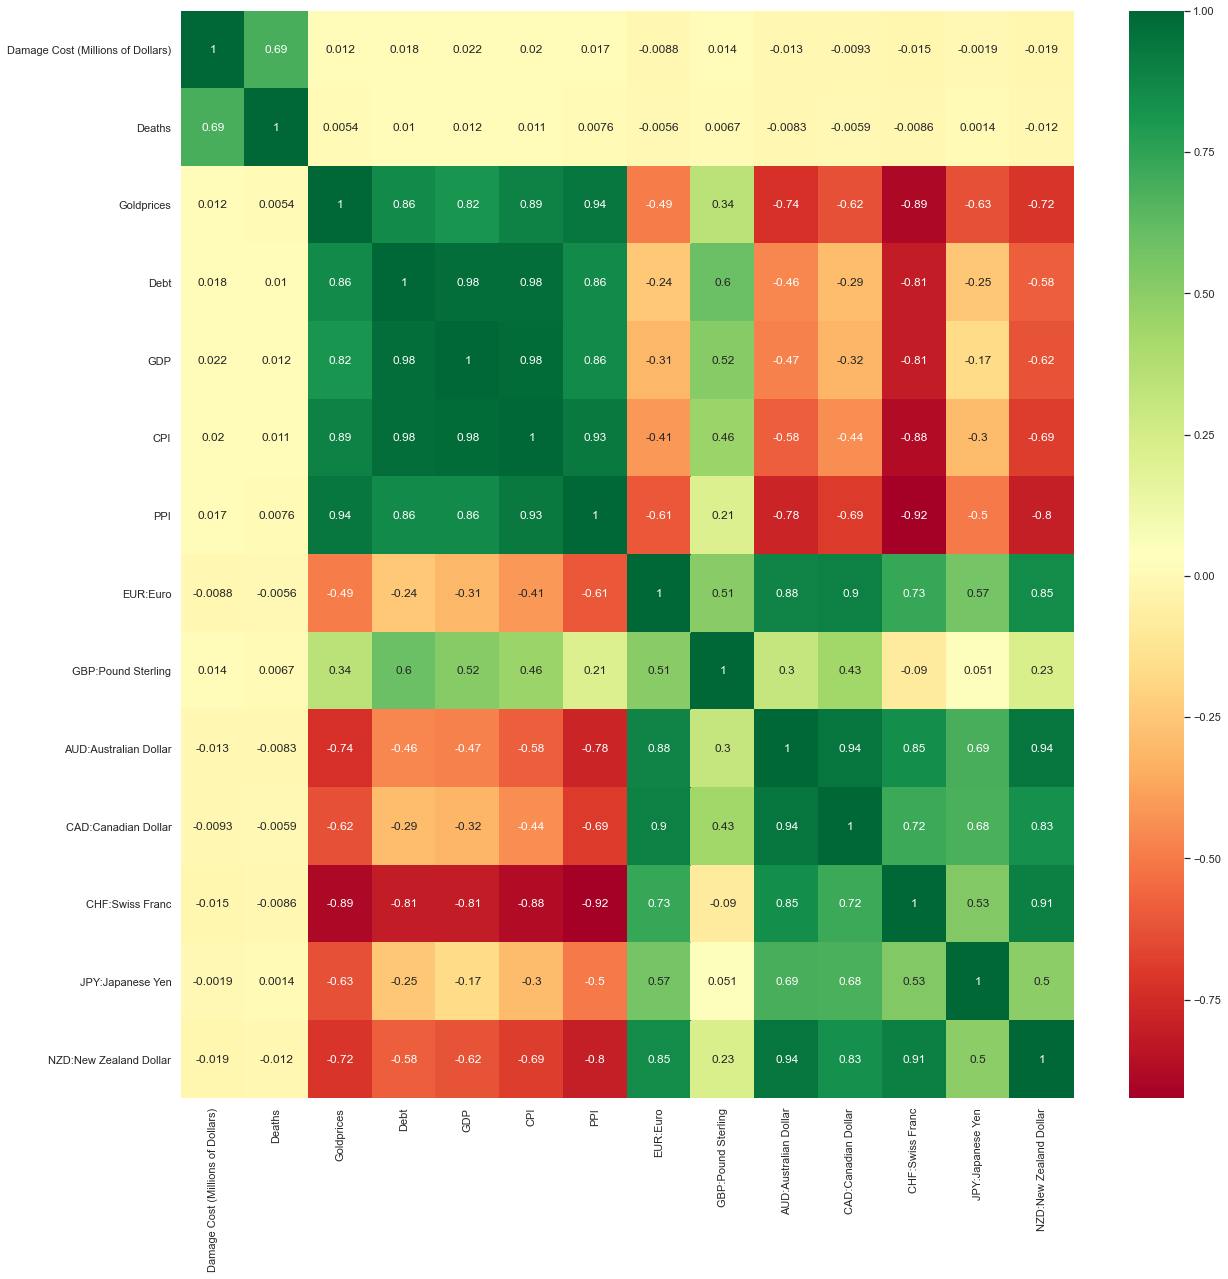

In [26]:
corrmat = disaster_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(disaster_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
featured_data['year'] = featured_data['Date'].dt.year
featured_data['month'] = featured_data['Date'].dt.month
featured_data['day'] = featured_data['Date'].dt.day
featured_data['week'] = featured_data['Date'].dt.week

featured_data.drop(['Date', 'Name'], axis =1)

disaster_event  Disaster  Damage Cost (Millions of Dollars)  Deaths  \
0                 0         3                                0.0     0.0   
1                 0         3                                0.0     0.0   
2                 0         3                                0.0     0.0   
3                 0         3                                0.0     0.0   
4                 0         3                                0.0     0.0   
...             ...       ...                                ...     ...   
5215              0         3                                0.0     0.0   
5216              0         3                                0.0     0.0   
5217              0         3                                0.0     0.0   
5218              0         3                                0.0     0.0   
5219              0         3                                0.0     0.0   

      Goldprices      Debt        GDP      CPI    PPI  EUR:Euro  \
0          100.9   5773392  10002.857  169.300  128.3  0.991080   
1           97.8   5773392  10002.857  169.300  128.3  0.970403   
2           97.5   5773392  10002.857  169.300  128.3  0.964506   
3           97.1   5773392  10002.857  169.300  128.3  0.962649   
4           98.0   5773392  10002.857  169.300  128.3  0.972384   
...          ...       ...        ...      ...    ...       ...   
5215       515.0  23201380  21729.124  258.444  199.0  0.900558   
5216       515.0  23201380  21729.124  258.444  199.0  0.898589   
5217       525.2  23201380  21729.124  258.444  199.0  0.896620   
5218       526.3  23201380  21729.124  258.444  199.0  0.893735   
5219       526.3  23201380  21729.124  258.444  199.0  0.890155   

      GBP:Pound Sterling  AUD:Australian Dollar  CAD:Canadian Dollar  \
0               0.619029               1.520912             1.444698   
1               0.610966               1.521300             1.449393   
2               0.609954               1.521316             1.453029   
3               0.606662               1.523681             1.452734   
4               0.608907               1.530338             1.459549   
...                  ...                    ...                  ...   
5215            0.769069               1.441916             1.313493   
5216            0.766181               1.438075             1.310920   
5217            0.763292               1.434233             1.308348   
5218            0.761534               1.429261             1.306730   
5219            0.757344               1.423803             1.299448   

      CHF:Swiss Franc  JPY:Japanese Yen  NZD:New Zealand Dollar  year  month  \
0            1.589990        101.833499                1.915857  2000      1   
1            1.557787        102.746240                1.916060  2000      1   
2            1.548997        103.530093                1.924769  2000      1   
3            1.546785        104.659222                1.931459  2000      1   
4            1.563497        105.105018                1.939129  2000      1   
...               ...               ...                     ...   ...    ...   
5215         0.979986        109.449448                1.503549  2019     12   
5216         0.978202        109.521639                1.498435  2019     12   
5217         0.976419        109.593831                1.493320  2019     12   
5218         0.971579        109.205470                1.486996  2019     12   
5219         0.966174        108.545487                1.482375  2019     12   

      day  week  
0       3     1  
1       4     1  
2       5     1  
3       6     1  
4       7     1  
...   ...   ...  
5215   25    52  
5216   26    52  
5217   27    52  
5218   30     1  
5219   31     1  

[5220 rows x 20 columns]

In [28]:
featured_data = featured_data[['year','month','day','week','disaster_event', 'Disaster', 'Damage Cost (Millions of Dollars)', 'Deaths', 'Goldprices', 'Debt', 'GDP', 'CPI', 'PPI','EUR:Euro', 'GBP:Pound Sterling', 'AUD:Australian Dollar', 'CAD:Canadian Dollar', 'CHF:Swiss Franc'
               , 'JPY:Japanese Yen', 'NZD:New Zealand Dollar']]

In [29]:
features_lagged = featured_data.copy()
for items in features_lagged.columns:
    features_lagged[items+'_Lags']= features_lagged[items].shift(2)

features_lagged = features_lagged.dropna()
features_lagged

year  month  day  week disaster_event  Disaster  \
2     2000      1    5     1              0         3   
3     2000      1    6     1              0         3   
4     2000      1    7     1              0         3   
5     2000      1   10     2              0         3   
6     2000      1   11     2              0         3   
...    ...    ...  ...   ...            ...       ...   
5215  2019     12   25    52              0         3   
5216  2019     12   26    52              0         3   
5217  2019     12   27    52              0         3   
5218  2019     12   30     1              0         3   
5219  2019     12   31     1              0         3   

      Damage Cost (Millions of Dollars)  Deaths  Goldprices      Debt  ...  \
2                                   0.0     0.0        97.5   5773392  ...   
3                                   0.0     0.0        97.1   5773392  ...   
4                                   0.0     0.0        98.0   5773392  ...   
5                                   0.0     0.0        97.9   5773392  ...   
6                                   0.0     0.0        98.1   5773392  ...   
...                                 ...     ...         ...       ...  ...   
5215                                0.0     0.0       515.0  23201380  ...   
5216                                0.0     0.0       515.0  23201380  ...   
5217                                0.0     0.0       525.2  23201380  ...   
5218                                0.0     0.0       526.3  23201380  ...   
5219                                0.0     0.0       526.3  23201380  ...   

       GDP_Lags  CPI_Lags  PPI_Lags  EUR:Euro_Lags  GBP:Pound Sterling_Lags  \
2     10002.857   169.300     128.3       0.991080                 0.619029   
3     10002.857   169.300     128.3       0.970403                 0.610966   
4     10002.857   169.300     128.3       0.964506                 0.609954   
5     10002.857   169.300     128.3       0.962649                 0.606662   
6     10002.857   169.300     128.3       0.972384                 0.608907   
...         ...       ...       ...            ...                      ...   
5215  21729.124   258.444     199.0       0.902935                 0.773887   
5216  21729.124   258.444     199.0       0.902527                 0.771958   
5217  21729.124   258.444     199.0       0.900558                 0.769069   
5218  21729.124   258.444     199.0       0.898589                 0.766181   
5219  21729.124   258.444     199.0       0.896620                 0.763292   

      AUD:Australian Dollar_Lags  CAD:Canadian Dollar_Lags  \
2                       1.520912                  1.444698   
3                       1.521300                  1.449393   
4                       1.521316                  1.453029   
5                       1.523681                  1.452734   
6                       1.530338                  1.459549   
...                          ...                       ...   
5215                    1.445418                  1.316208   
5216                    1.445758                  1.316065   
5217                    1.441916                  1.313493   
5218                    1.438075                  1.310920   
5219                    1.434233                  1.308348   

      CHF:Swiss Franc_Lags  JPY:Japanese Yen_Lags  NZD:New Zealand Dollar_Lags  
2                 1.589990             101.833499                     1.915857  
3                 1.557787             102.746240                     1.916060  
4                 1.548997             103.530093                     1.924769  
5                 1.546785             104.659222                     1.931459  
6                 1.563497             105.105018                     1.939129  
...                    ...                    ...                          ...  
5215              0.981490             109.417607                     1.510790  
5216              0.981769             109

## Linear Regression Algorithm:

In [30]:
def linear_model(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values
        y = dataset[col].values
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
        
        print('USD vs', col)
        print(' \n ')
        
        regressor = LinearRegression()  
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df_head = pred_df.head(20)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()
        
        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Percentage Error:', mape)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('Accuracy:', accuracy)
        
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

USD vs EUR:Euro
 
 
      Actual  Predicted
0   0.842105   0.841536
1   0.752106   0.750327
2   0.763767   0.763986
3   0.777786   0.777441
4   1.028278   1.029960
5   1.057194   1.059389
6   0.732762   0.735271
7   1.156604   1.167296
8   0.755002   0.757577
9   1.074691   1.074357
10  0.807363   0.808962
11  0.678380   0.678076
12  0.761557   0.761366
13  0.957396   0.958626
14  0.760746   0.762773
15  0.775615   0.772856
16  0.781311   0.771835
17  1.165365   1.170914
18  0.852442   0.844398
19  0.688326   0.686559


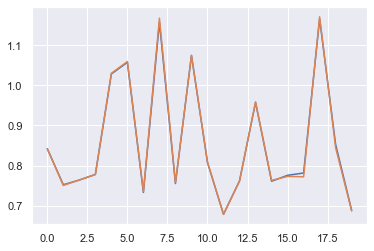

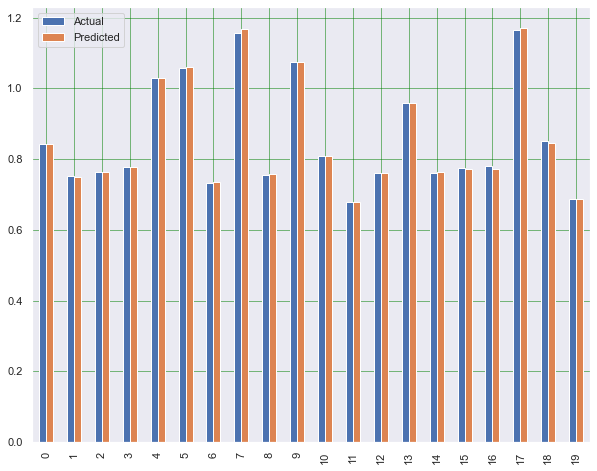

Mean Absolute Percentage Error: 0.2883427251277821
Mean Absolute Error: 0.0024378573531967295
Mean Squared Error: 1.4930869686490686e-05
Root Mean Squared Error: 0.0038640483545746016
Accuracy: 99.71165727487222
 
 
---------------------------------------------
 
 
USD vs GBP:Pound Sterling
 
 
      Actual  Predicted
0   0.574989   0.575522
1   0.658093   0.660119
2   0.625640   0.628933
3   0.525161   0.523096
4   0.631362   0.629966
5   0.684322   0.683813
6   0.624460   0.624062
7   0.688873   0.677571
8   0.657456   0.649524
9   0.680279   0.688652
10  0.561602   0.560367
11  0.484974   0.486596
12  0.629008   0.630379
13  0.816659   0.815703
14  0.636630   0.636313
15  0.513185   0.517568
16  0.641613   0.641672
17  0.713670   0.717013
18  0.770079   0.768015
19  0.618736   0.623262


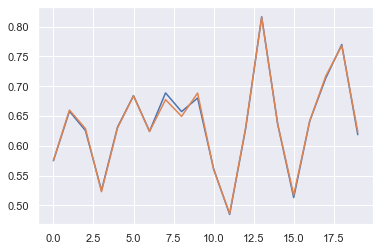

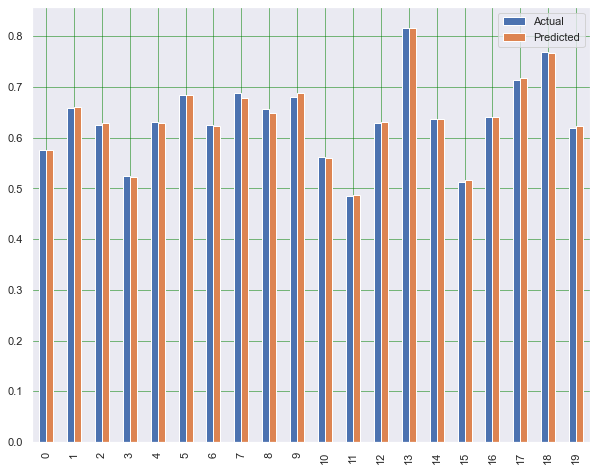

Mean Absolute Percentage Error: 0.45030281462300553
Mean Absolute Error: 0.00293627540617525
Mean Squared Error: 1.9288562187939077e-05
Root Mean Squared Error: 0.004391874564230982
Accuracy: 99.549697185377
 
 
---------------------------------------------
 
 
USD vs AUD:Australian Dollar
 
 
      Actual  Predicted
0   1.361011   1.361565
1   1.082581   1.082669
2   0.964485   0.961661
3   1.299370   1.303409
4   1.640308   1.641435
5   1.753145   1.751569
6   1.012091   1.014495
7   1.894518   1.923289
8   1.082899   1.088094
9   1.914240   1.893396
10  1.297352   1.299179
11  1.142595   1.142887
12  0.970452   0.970725
13  1.391288   1.395014
14  0.937695   0.934037
15  1.283177   1.280591
16  1.115712   1.121055
17  1.916327   1.912373
18  1.268349   1.269926
19  1.073307   1.078065


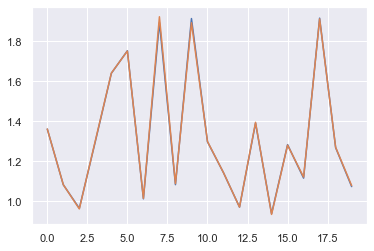

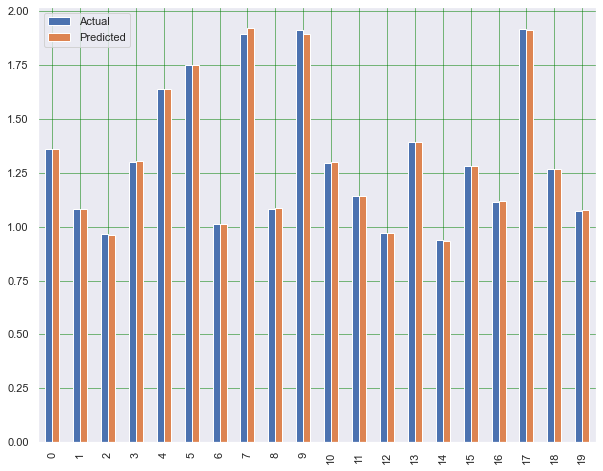

Mean Absolute Percentage Error: 0.4121567062470958
Mean Absolute Error: 0.005535315405332456
Mean Squared Error: 5.9382764625043676e-05
Root Mean Squared Error: 0.00770602132264398
Accuracy: 99.58784329375291
 
 
---------------------------------------------
 
 
USD vs CAD:Canadian Dollar
 
 
      Actual  Predicted
0   1.148632   1.155063
1   1.008348   1.000953
2   0.990300   0.998484
3   1.119312   1.115835
4   1.452237   1.440551
5   1.535786   1.530754
6   1.018172   1.012518
7   1.533773   1.514112
8   1.011854   1.005006
9   1.543471   1.542914
10  1.219118   1.208943
11  1.005020   1.001032
12  1.002665   0.996058
13  1.353375   1.350621
14  0.998783   0.999908
15  1.173970   1.175664
16  1.041409   1.043096
17  1.529192   1.520590
18  1.268008   1.269897
19  1.027533   1.024538


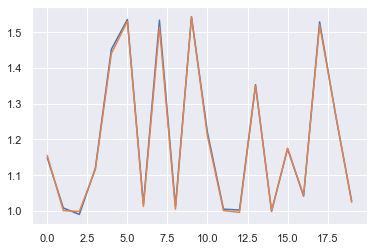

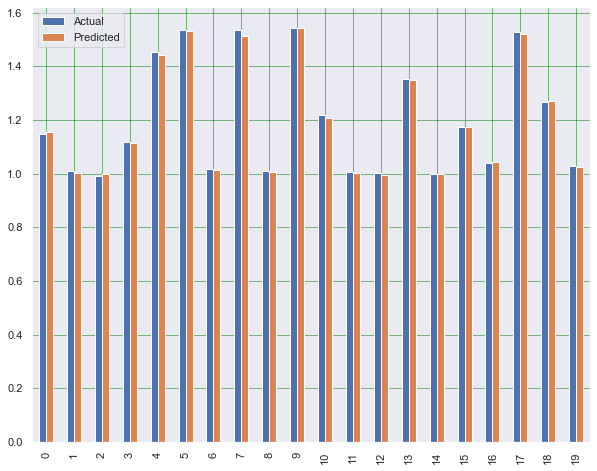

Mean Absolute Percentage Error: 0.4529835110553476
Mean Absolute Error: 0.005559374500583058
Mean Squared Error: 5.738219134401849e-05
Root Mean Squared Error: 0.00757510338833857
Accuracy: 99.54701648894465
 
 
---------------------------------------------
 
 
USD vs CHF:Swiss Franc
 
 
      Actual  Predicted
0   1.313095   1.313775
1   1.077316   1.072636
2   0.918964   0.920423
3   1.226414   1.225398
4   1.652956   1.652261
5   1.556718   1.560498
6   0.987396   0.982363
7   1.768217   1.769634
8   1.082748   1.079934
9   1.652445   1.659730
10  1.258921   1.260655
11  1.117970   1.118254
12  0.914706   0.913914
13  1.029584   1.025414
14  0.918828   0.915124
15  1.250679   1.250038
16  1.053832   1.067064
17  1.782077   1.782140
18  0.962663   0.975618
19  1.015625   1.021636


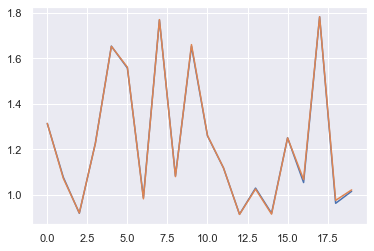

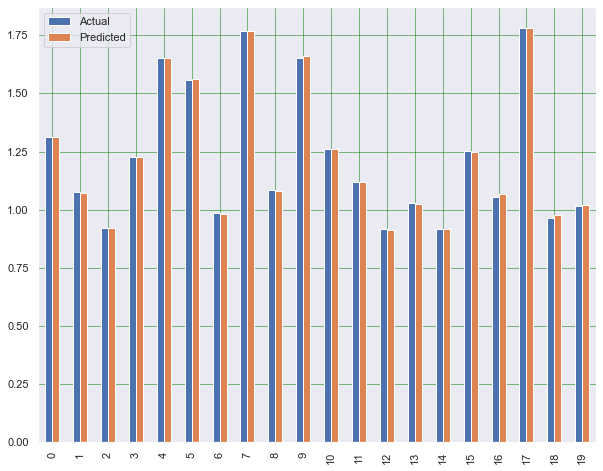

Mean Absolute Percentage Error: 0.3314184434457775
Mean Absolute Error: 0.0037035418672054206
Mean Squared Error: 4.3465402138905364e-05
Root Mean Squared Error: 0.0065928296003237765
Accuracy: 99.66858155655422
 
 
---------------------------------------------
 
 
USD vs JPY:Japanese Yen
 
 
        Actual   Predicted
0   118.661053  118.291013
1    93.080626   94.200678
2    81.448102   80.872648
3   114.816831  115.117904
4   107.331620  107.824664
5   124.674913  124.190316
6    83.329670   83.357568
7   108.292852  108.311148
8    93.982635   94.104189
9   119.441161  116.933061
10  111.521072  110.898107
11  109.795808  110.341968
12   80.862082   81.183472
13  117.386309  117.564044
14   76.972233   77.209509
15  120.406422  119.492760
16   85.772326   84.942696
17  123.190770  121.428280
18  109.743415  110.329189
19   92.393998   92.498788


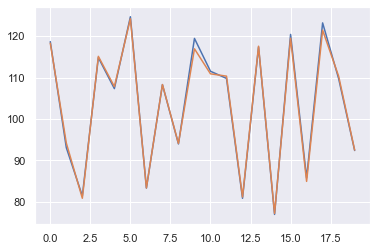

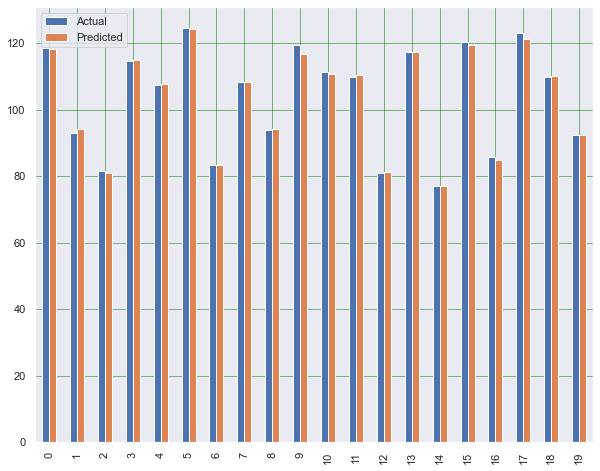

Mean Absolute Percentage Error: 0.5648657941076429
Mean Absolute Error: 0.5956765598732788
Mean Squared Error: 0.6081866756423203
Root Mean Squared Error: 0.7798632416278641
Accuracy: 99.43513420589235
 
 
---------------------------------------------
 
 
USD vs NZD:New Zealand Dollar
 
 
      Actual  Predicted
0   1.520421   1.509960
1   1.424113   1.432080
2   1.222256   1.219369
3   1.576495   1.584212
4   2.041440   2.054687
5   2.047257   2.044673
6   1.287975   1.289918
7   2.498843   2.480872
8   1.394866   1.392846
9   2.314562   2.327392
10  1.443485   1.446171
11  1.311580   1.305503
12  1.220699   1.222330
13  1.452178   1.452013
14  1.213313   1.219098
15  1.449779   1.452046
16  1.410266   1.401136
17  2.416385   2.412861
18  1.364845   1.364124
19  1.348706   1.342298


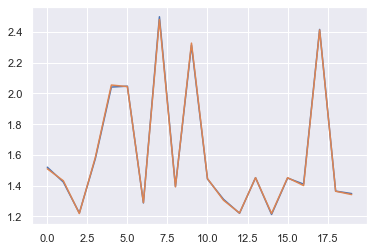

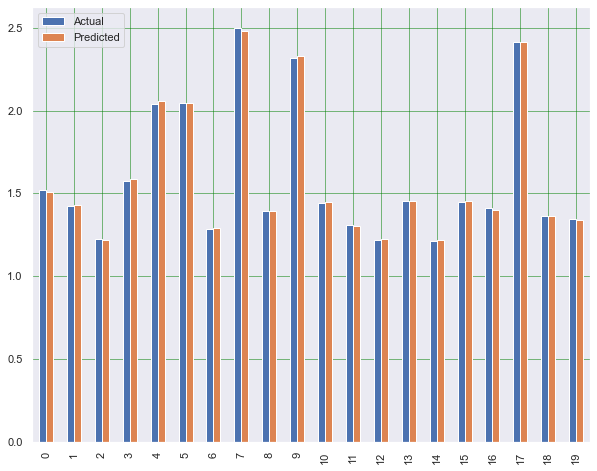

Mean Absolute Percentage Error: 0.4686640999711271
Mean Absolute Error: 0.007276570134950409
Mean Squared Error: 9.754091384659057e-05
Root Mean Squared Error: 0.009876280364924366
Accuracy: 99.53133590002888
 
 
---------------------------------------------
 
 


In [31]:
linear_model(features_lagged)

## Decision Trees with Regression Algorithm:

In [32]:
def decisiontree_regressor(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values
        y = dataset[col].values
        
        sc_x = MinMaxScaler()
        x = sc_x.fit_transform(x)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
        
        print('USD vs', col)
        print(' \n ')
        
        DT_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10) 
                             
        DT_regressor.fit(x_train, y_train)
        y_pred = DT_regressor.predict(x_test)
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df_head = pred_df.head(20)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        plt.legend()
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()

        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Percentage Error:', mape)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('Accuracy:', accuracy)
        
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

No handles with labels found to put in legend.


USD vs EUR:Euro
 
 
      Actual  Predicted
0   0.842105   0.844987
1   0.752106   0.735241
2   0.763767   0.761657
3   0.777786   0.780021
4   1.028278   1.029416
5   1.057194   1.054821
6   0.732762   0.732489
7   1.156604   1.168088
8   0.755002   0.750123
9   1.074691   1.074171
10  0.807363   0.813744
11  0.678380   0.678225
12  0.761557   0.756574
13  0.957396   0.957106
14  0.760746   0.765094
15  0.775615   0.772186
16  0.781311   0.772186
17  1.165365   1.168497
18  0.852442   0.849660
19  0.688326   0.702223


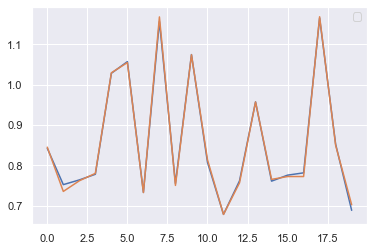

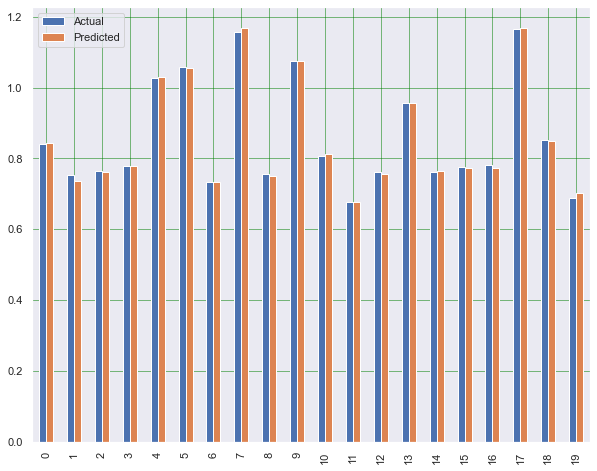

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.6165535703946697
Mean Absolute Error: 0.005179130966909291
Mean Squared Error: 5.762519982666862e-05
Root Mean Squared Error: 0.007591126387214786
Accuracy: 99.38344642960533
 
 
---------------------------------------------
 
 
USD vs GBP:Pound Sterling
 
 
      Actual  Predicted
0   0.574989   0.575783
1   0.658093   0.651415
2   0.625640   0.628727
3   0.525161   0.526268
4   0.631362   0.635146
5   0.684322   0.687065
6   0.624460   0.625439
7   0.688873   0.692070
8   0.657456   0.651433
9   0.680279   0.687065
10  0.561602   0.559516
11  0.484974   0.487553
12  0.629008   0.628727
13  0.816659   0.814874
14  0.636630   0.641178
15  0.513185   0.517160
16  0.641613   0.635146
17  0.713670   0.713041
18  0.770079   0.768539
19  0.618736   0.617990


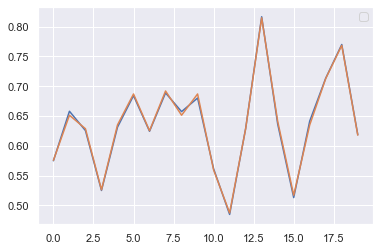

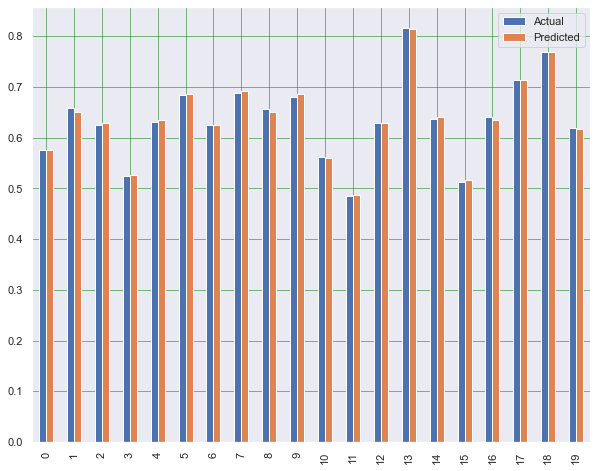

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.6485476283725681
Mean Absolute Error: 0.004210345013148015
Mean Squared Error: 4.0866251691371634e-05
Root Mean Squared Error: 0.006392671717785267
Accuracy: 99.35145237162743
 
 
---------------------------------------------
 
 
USD vs AUD:Australian Dollar
 
 
      Actual  Predicted
0   1.361011   1.352111
1   1.082581   1.081255
2   0.964485   0.966588
3   1.299370   1.316217
4   1.640308   1.646280
5   1.753145   1.753974
6   1.012091   1.021545
7   1.894518   1.968190
8   1.082899   1.081255
9   1.914240   1.930030
10  1.297352   1.309032
11  1.142595   1.113805
12  0.970452   0.967347
13  1.391288   1.391013
14  0.937695   0.944890
15  1.283177   1.286605
16  1.115712   1.095886
17  1.916327   1.898927
18  1.268349   1.262316
19  1.073307   1.087617


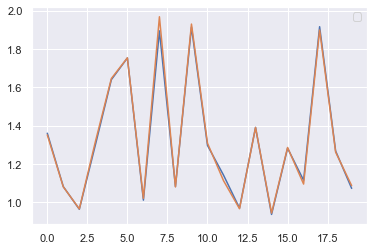

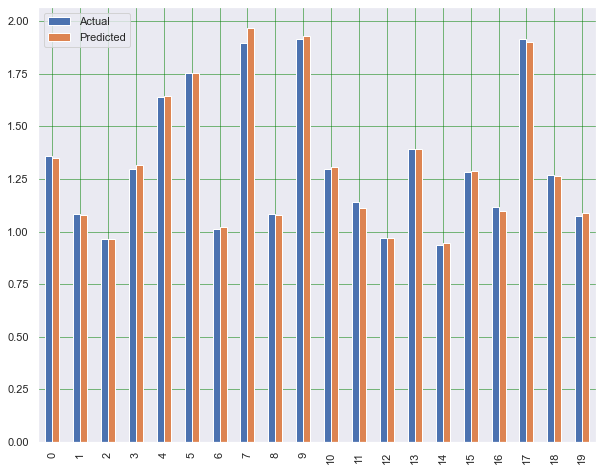

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.7750391413679619
Mean Absolute Error: 0.010318923643444576
Mean Squared Error: 0.0002334471385331509
Root Mean Squared Error: 0.015278977011997593
Accuracy: 99.22496085863204
 
 
---------------------------------------------
 
 
USD vs CAD:Canadian Dollar
 
 
      Actual  Predicted
0   1.148632   1.155912
1   1.008348   1.000127
2   0.990300   0.994365
3   1.119312   1.124216
4   1.452237   1.451358
5   1.535786   1.534375
6   1.018172   1.015248
7   1.533773   1.524780
8   1.011854   1.010327
9   1.543471   1.541905
10  1.219118   1.205092
11  1.005020   0.996380
12  1.002665   0.997139
13  1.353375   1.353231
14  0.998783   1.003210
15  1.173970   1.174427
16  1.041409   1.032398
17  1.529192   1.518263
18  1.268008   1.267455
19  1.027533   1.030413


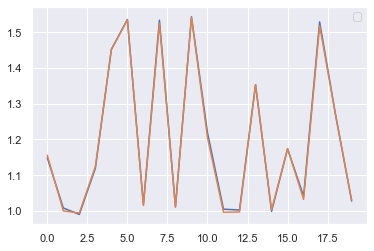

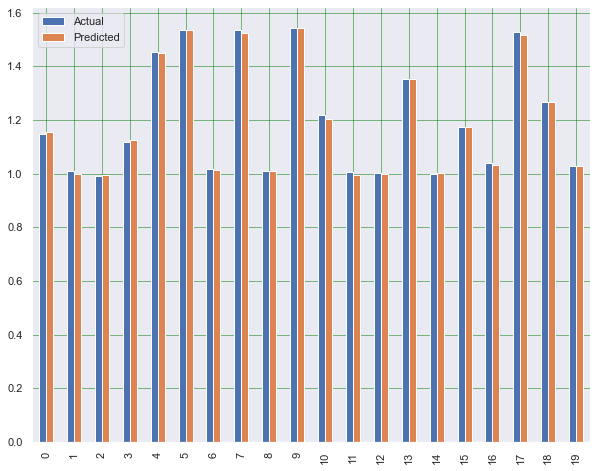

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.6054449508527802
Mean Absolute Error: 0.007343681018200357
Mean Squared Error: 0.00010376848983192978
Root Mean Squared Error: 0.01018668198344926
Accuracy: 99.39455504914721
 
 
---------------------------------------------
 
 
USD vs CHF:Swiss Franc
 
 
      Actual  Predicted
0   1.313095   1.313658
1   1.077316   1.079153
2   0.918964   0.918024
3   1.226414   1.226801
4   1.652956   1.656387
5   1.556718   1.566779
6   0.987396   0.985905
7   1.768217   1.745741
8   1.082748   1.079153
9   1.652445   1.656387
10  1.258921   1.251117
11  1.117970   1.106058
12  0.914706   0.913164
13  1.029584   1.030956
14  0.918828   0.929919
15  1.250679   1.250617
16  1.053832   1.072383
17  1.782077   1.766165
18  0.962663   0.968798
19  1.015625   1.045082


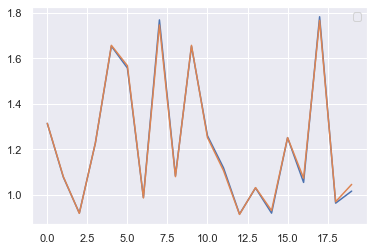

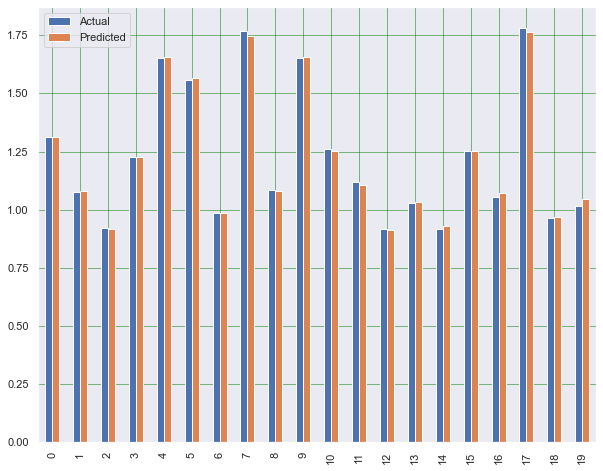

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.5981469661114657
Mean Absolute Error: 0.00686478728994247
Mean Squared Error: 9.896197969365132e-05
Root Mean Squared Error: 0.009947963595311924
Accuracy: 99.40185303388853
 
 
---------------------------------------------
 
 
USD vs JPY:Japanese Yen
 
 
        Actual   Predicted
0   118.661053  117.938617
1    93.080626   93.793509
2    81.448102   80.681405
3   114.816831  115.140669
4   107.331620  108.461841
5   124.674913  124.488388
6    83.329670   82.570806
7   108.292852  111.906125
8    93.982635   93.793509
9   119.441161  119.214594
10  111.521072  110.903913
11  109.795808  109.020577
12   80.862082   80.996919
13  117.386309  117.343581
14   76.972233   77.642169
15  120.406422  119.345263
16   85.772326   85.556248
17  123.190770  122.092612
18  109.743415  109.763051
19   92.393998   93.793509


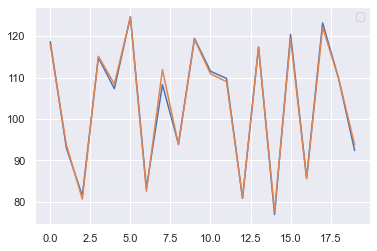

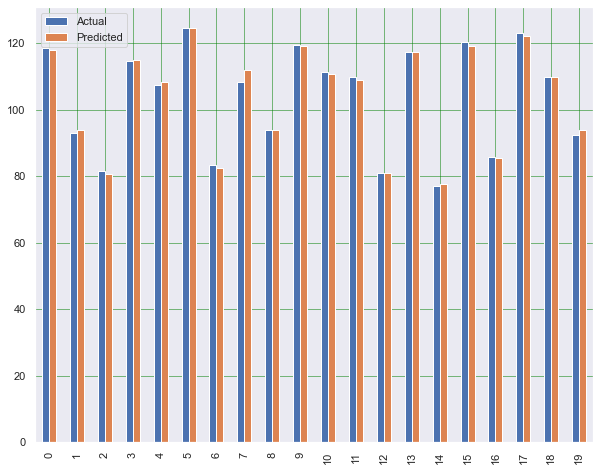

No handles with labels found to put in legend.


Mean Absolute Percentage Error: 0.6925050133954319
Mean Absolute Error: 0.732334673972473
Mean Squared Error: 1.0156256274901019
Root Mean Squared Error: 1.0077825298595435
Accuracy: 99.30749498660457
 
 
---------------------------------------------
 
 
USD vs NZD:New Zealand Dollar
 
 
      Actual  Predicted
0   1.520421   1.518498
1   1.424113   1.425216
2   1.222256   1.222758
3   1.576495   1.590044
4   2.041440   2.046350
5   2.047257   2.046350
6   1.287975   1.293908
7   2.498843   2.495673
8   1.394866   1.380465
9   2.314562   2.291077
10  1.443485   1.445101
11  1.311580   1.306355
12  1.220699   1.222758
13  1.452178   1.456998
14  1.213313   1.217497
15  1.449779   1.445101
16  1.410266   1.380465
17  2.416385   2.424898
18  1.364845   1.365867
19  1.348706   1.369224


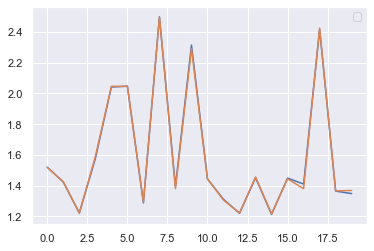

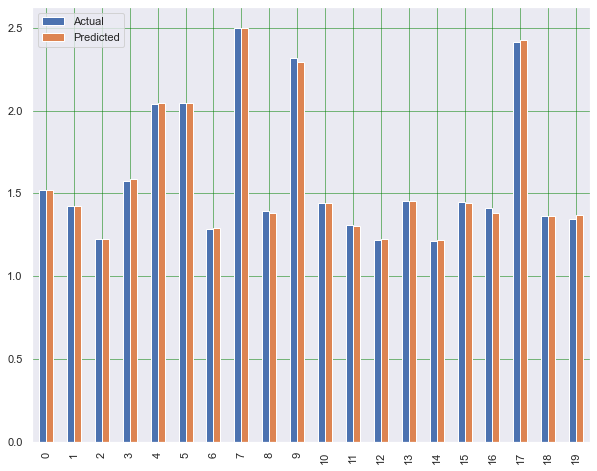

Mean Absolute Percentage Error: 0.8753946601343106
Mean Absolute Error: 0.013545433544076842
Mean Squared Error: 0.0003948390427149691
Root Mean Squared Error: 0.019870557181794604
Accuracy: 99.1246053398657
 
 
---------------------------------------------
 
 


In [33]:
decisiontree_regressor(features_lagged)

## KNN Algorithm:

In [34]:
def knn_algorithm(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values
        y = dataset[col].values
        
        sc_x = MinMaxScaler()
        x = sc_x.fit_transform(x)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
        
        print('USD vs', col)
        print(' \n ')
        
        knn_model = neighbors.KNeighborsRegressor(n_neighbors = 4)
        knn_model.fit(x_train, y_train)
        y_pred = knn_model.predict(x_test)
        
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df_head = pred_df.head(20)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()
        
        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Percentage Error:', mape)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('Accuracy:', accuracy)
        
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

USD vs EUR:Euro
 
 
      Actual  Predicted
0   0.842105   0.838736
1   0.752106   0.744846
2   0.763767   0.762620
3   0.777786   0.781538
4   1.028278   1.068132
5   1.057194   1.063106
6   0.732762   0.736988
7   1.156604   1.143139
8   0.755002   0.744601
9   1.074691   1.071763
10  0.807363   0.825461
11  0.678380   0.695948
12  0.761557   0.764706
13  0.957396   0.954998
14  0.760746   0.763789
15  0.775615   0.769709
16  0.781311   0.771385
17  1.165365   1.163287
18  0.852442   0.849424
19  0.688326   0.693621


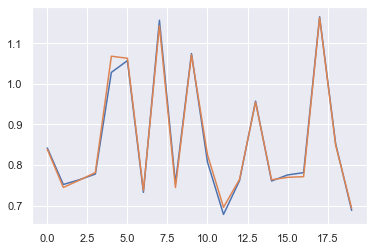

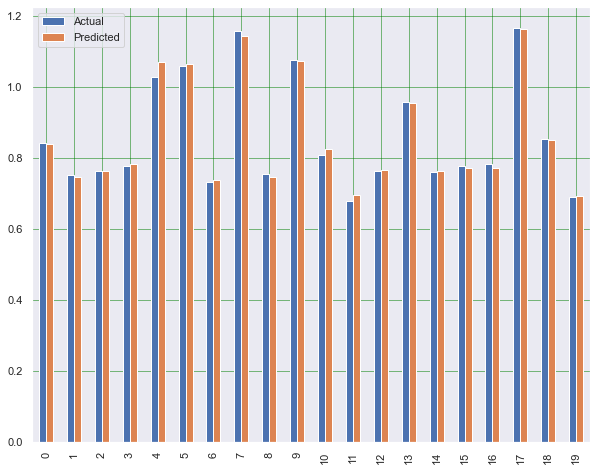

Mean Absolute Percentage Error: 0.8461238567519557
Mean Absolute Error: 0.0070575757343550455
Mean Squared Error: 0.00015222588421807682
Root Mean Squared Error: 0.01233798541975459
Accuracy: 99.15387614324804
 
 
---------------------------------------------
 
 
USD vs GBP:Pound Sterling
 
 
      Actual  Predicted
0   0.574989   0.572237
1   0.658093   0.654662
2   0.625640   0.626682
3   0.525161   0.526748
4   0.631362   0.673581
5   0.684322   0.684026
6   0.624460   0.626430
7   0.688873   0.689620
8   0.657456   0.660697
9   0.680279   0.680877
10  0.561602   0.565040
11  0.484974   0.486111
12  0.629008   0.627187
13  0.816659   0.815289
14  0.636630   0.637936
15  0.513185   0.512176
16  0.641613   0.640293
17  0.713670   0.714418
18  0.770079   0.769401
19  0.618736   0.620292


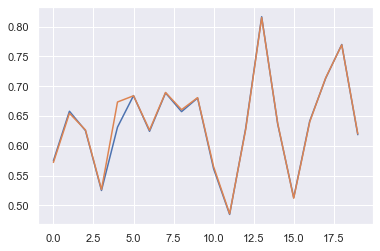

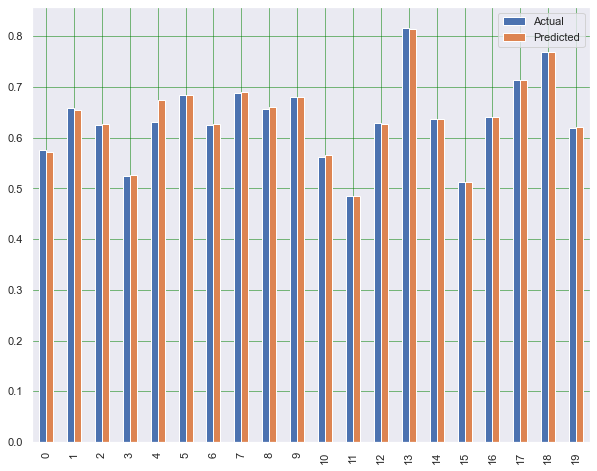

Mean Absolute Percentage Error: 0.8322091356676409
Mean Absolute Error: 0.005408634259259255
Mean Squared Error: 0.00010903444336172705
Root Mean Squared Error: 0.010441955916480736
Accuracy: 99.16779086433236
 
 
---------------------------------------------
 
 
USD vs AUD:Australian Dollar
 
 
      Actual  Predicted
0   1.361011   1.350488
1   1.082581   1.078937
2   0.964485   0.961504
3   1.299370   1.310747
4   1.640308   1.816954
5   1.753145   1.749083
6   1.012091   1.019145
7   1.894518   1.862826
8   1.082899   1.089291
9   1.914240   1.913845
10  1.297352   1.325559
11  1.142595   1.117359
12  0.970452   0.974916
13  1.391288   1.389896
14  0.937695   0.944923
15  1.283177   1.283815
16  1.115712   1.096721
17  1.916327   1.944511
18  1.268349   1.268716
19  1.073307   1.085623


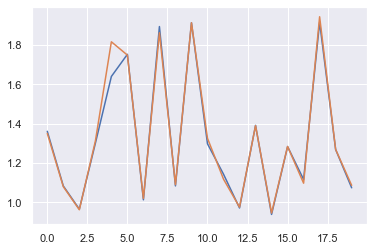

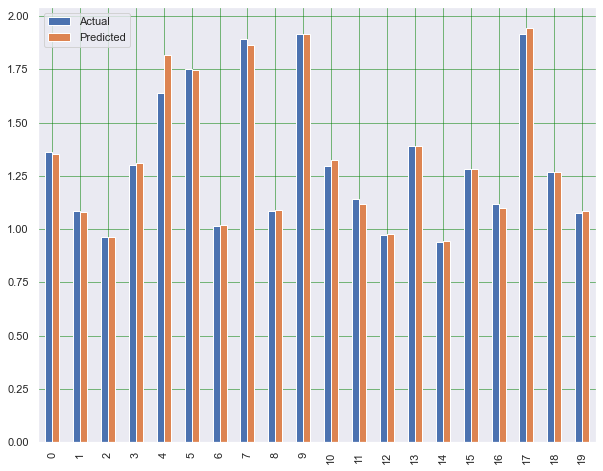

Mean Absolute Percentage Error: 1.019330275987369
Mean Absolute Error: 0.013379645625798216
Mean Squared Error: 0.0005376328130420354
Root Mean Squared Error: 0.02318691038155009
Accuracy: 98.98066972401263
 
 
---------------------------------------------
 
 
USD vs CAD:Canadian Dollar
 
 
      Actual  Predicted
0   1.148632   1.149403
1   1.008348   1.004082
2   0.990300   0.993534
3   1.119312   1.124035
4   1.452237   1.503423
5   1.535786   1.533700
6   1.018172   1.018551
7   1.533773   1.527043
8   1.011854   1.014593
9   1.543471   1.534485
10  1.219118   1.226663
11  1.005020   0.984777
12  1.002665   0.999760
13  1.353375   1.350967
14  0.998783   1.004355
15  1.173970   1.171115
16  1.041409   1.034309
17  1.529192   1.531569
18  1.268008   1.270161
19  1.027533   1.035316


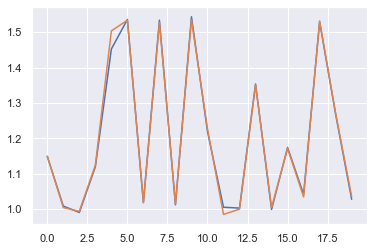

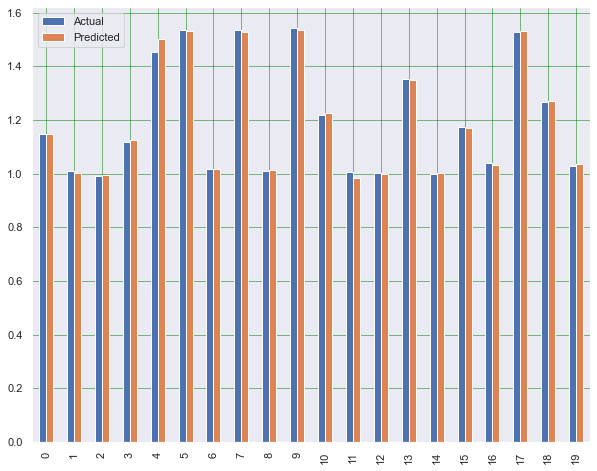

Mean Absolute Percentage Error: 0.7645664737569167
Mean Absolute Error: 0.009224452075351212
Mean Squared Error: 0.00027826399850154696
Root Mean Squared Error: 0.01668124691087411
Accuracy: 99.23543352624309
 
 
---------------------------------------------
 
 
USD vs CHF:Swiss Franc
 
 
      Actual  Predicted
0   1.313095   1.308512
1   1.077316   1.068896
2   0.918964   0.917621
3   1.226414   1.232165
4   1.652956   1.641059
5   1.556718   1.565955
6   0.987396   0.991196
7   1.768217   1.738088
8   1.082748   1.066167
9   1.652445   1.649069
10  1.258921   1.284498
11  1.117970   1.157933
12  0.914706   0.919409
13  1.029584   1.024150
14  0.918828   0.921134
15  1.250679   1.248492
16  1.053832   1.039446
17  1.782077   1.778269
18  0.962663   0.967547
19  1.015625   1.027084


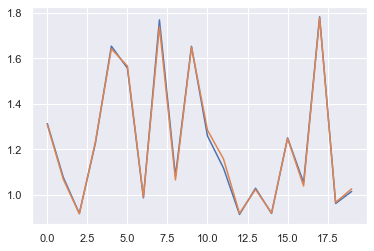

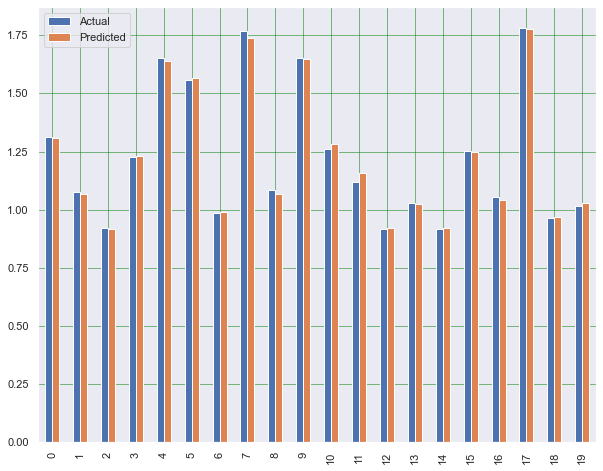

Mean Absolute Percentage Error: 0.8393940183582195
Mean Absolute Error: 0.009578266762452114
Mean Squared Error: 0.00027627972599886545
Root Mean Squared Error: 0.016621664357063207
Accuracy: 99.16060598164178
 
 
---------------------------------------------
 
 
USD vs JPY:Japanese Yen
 
 
        Actual   Predicted
0   118.661053  117.781545
1    93.080626   93.737038
2    81.448102   81.908220
3   114.816831  115.691884
4   107.331620  118.107045
5   124.674913  124.775315
6    83.329670   83.350433
7   108.292852  109.900546
8    93.982635   93.107742
9   119.441161  118.281907
10  111.521072  111.651580
11  109.795808  114.280246
12   80.862082   80.894865
13  117.386309  117.139817
14   76.972233   77.173101
15  120.406422  121.269920
16   85.772326   84.932827
17  123.190770  124.103770
18  109.743415  109.835689
19   92.393998   92.243268


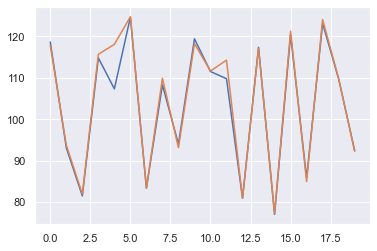

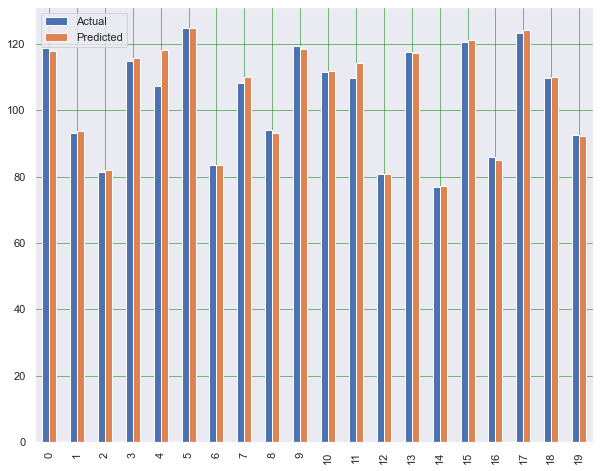

Mean Absolute Percentage Error: 0.9454960054990533
Mean Absolute Error: 0.9906152872286083
Mean Squared Error: 3.543489967940641
Root Mean Squared Error: 1.8824159922664918
Accuracy: 99.05450399450095
 
 
---------------------------------------------
 
 
USD vs NZD:New Zealand Dollar
 
 
      Actual  Predicted
0   1.520421   1.505190
1   1.424113   1.414824
2   1.222256   1.222318
3   1.576495   1.592278
4   2.041440   2.200574
5   2.047257   2.043091
6   1.287975   1.297389
7   2.498843   2.437232
8   1.394866   1.403359
9   2.314562   2.332504
10  1.443485   1.463532
11  1.311580   1.309249
12  1.220699   1.234274
13  1.452178   1.446212
14  1.213313   1.222620
15  1.449779   1.452758
16  1.410266   1.390279
17  2.416385   2.438211
18  1.364845   1.369508
19  1.348706   1.357736


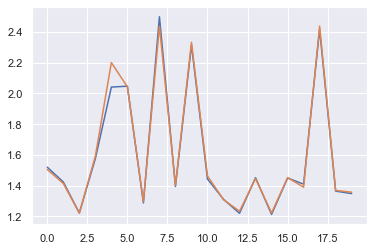

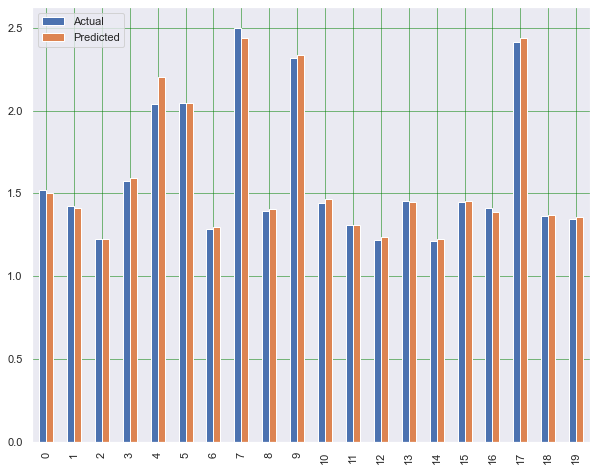

Mean Absolute Percentage Error: 1.0578954744327804
Mean Absolute Error: 0.016256566858237544
Mean Squared Error: 0.0007552131800240369
Root Mean Squared Error: 0.027481142261995533
Accuracy: 98.94210452556722
 
 
---------------------------------------------
 
 


In [35]:
knn_algorithm(features_lagged)

## XG Boost Algorithm:

In [36]:
def xgb_model(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values
        y = dataset[col].values
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        scale_x = scaler.fit_transform(x)
        
        x_train, x_test, y_train, y_test = train_test_split(scale_x, y, test_size=0.25, random_state=0)
        
        print('USD vs', col)
        print(' \n ')
        
        model = XGBRegressor(objective ='reg:squarederror',
                     seed=100,
                     n_estimators=100,
                     max_depth=3,
                     learning_rate=0.1,
                     min_child_weight=1,
                     subsample=1,
                     colsample_bytree=1,
                     colsample_bylevel=1,
                     gamma=0)

        # Train the regressor
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df_head = pred_df.head(20)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()

        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Percentage Error:', mape)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('Accuracy:', accuracy)
        
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

USD vs EUR:Euro
 
 
      Actual  Predicted
0   0.842105   0.835469
1   0.752106   0.748389
2   0.763767   0.763094
3   0.777786   0.777429
4   1.028278   1.031167
5   1.057194   1.056665
6   0.732762   0.735549
7   1.156604   1.167518
8   0.755002   0.751743
9   1.074691   1.083445
10  0.807363   0.812512
11  0.678380   0.679344
12  0.761557   0.762614
13  0.957396   0.954469
14  0.760746   0.769458
15  0.775615   0.770337
16  0.781311   0.771795
17  1.165365   1.172393
18  0.852442   0.847815
19  0.688326   0.700254


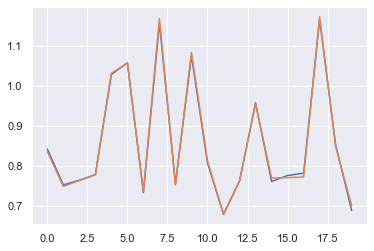

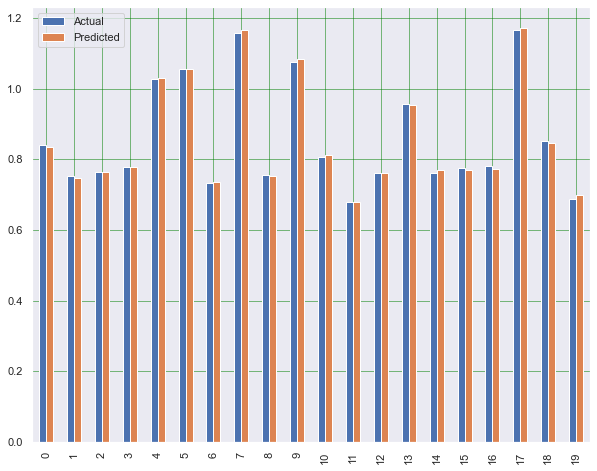

Mean Absolute Percentage Error: 0.5722705803583532
Mean Absolute Error: 0.004822433398000003
Mean Squared Error: 4.2576810003825326e-05
Root Mean Squared Error: 0.006525090804258997
Accuracy: 99.42772941964165
 
 
---------------------------------------------
 
 
USD vs GBP:Pound Sterling
 
 
      Actual  Predicted
0   0.574989   0.571679
1   0.658093   0.657588
2   0.625640   0.630009
3   0.525161   0.521948
4   0.631362   0.635597
5   0.684322   0.686101
6   0.624460   0.624214
7   0.688873   0.691478
8   0.657456   0.649302
9   0.680279   0.689526
10  0.561602   0.561932
11  0.484974   0.488151
12  0.629008   0.630075
13  0.816659   0.814690
14  0.636630   0.641828
15  0.513185   0.517772
16  0.641613   0.639615
17  0.713670   0.718550
18  0.770079   0.764396
19  0.618736   0.628695


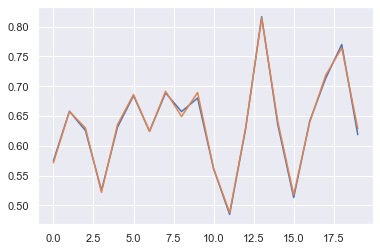

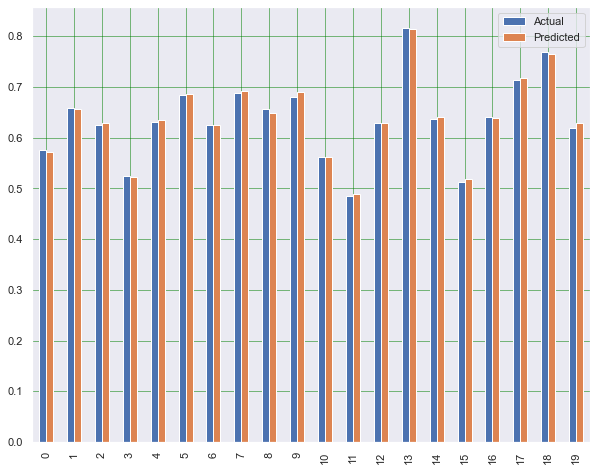

Mean Absolute Percentage Error: 0.5816755648809271
Mean Absolute Error: 0.003766603429623308
Mean Squared Error: 2.834795556624607e-05
Root Mean Squared Error: 0.005324279816674371
Accuracy: 99.41832443511908
 
 
---------------------------------------------
 
 
USD vs AUD:Australian Dollar
 
 
      Actual  Predicted
0   1.361011   1.351956
1   1.082581   1.081059
2   0.964485   0.964501
3   1.299370   1.314225
4   1.640308   1.648712
5   1.753145   1.743984
6   1.012091   1.021618
7   1.894518   1.928886
8   1.082899   1.076012
9   1.914240   1.907079
10  1.297352   1.301741
11  1.142595   1.120977
12  0.970452   0.967946
13  1.391288   1.393494
14  0.937695   0.954029
15  1.283177   1.289035
16  1.115712   1.103848
17  1.916327   1.917757
18  1.268349   1.266438
19  1.073307   1.092469


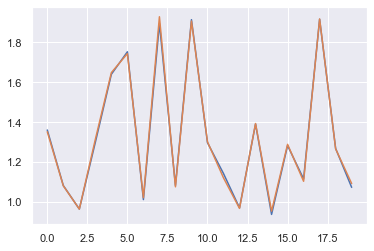

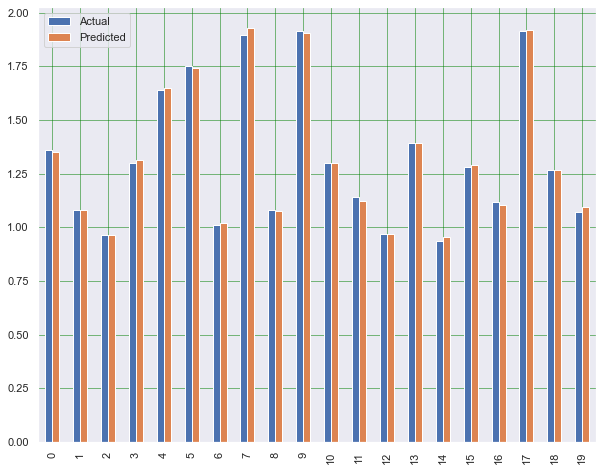

Mean Absolute Percentage Error: 0.6972943655040579
Mean Absolute Error: 0.009254053744616941
Mean Squared Error: 0.00016652185043919326
Root Mean Squared Error: 0.012904334560107826
Accuracy: 99.30270563449594
 
 
---------------------------------------------
 
 
USD vs CAD:Canadian Dollar
 
 
      Actual  Predicted
0   1.148632   1.153193
1   1.008348   1.000401
2   0.990300   0.999270
3   1.119312   1.117769
4   1.452237   1.447707
5   1.535786   1.533134
6   1.018172   1.014708
7   1.533773   1.532439
8   1.011854   1.001344
9   1.543471   1.541602
10  1.219118   1.212878
11  1.005020   0.998529
12  1.002665   0.998079
13  1.353375   1.351750
14  0.998783   1.009221
15  1.173970   1.176910
16  1.041409   1.043481
17  1.529192   1.521539
18  1.268008   1.267125
19  1.027533   1.032496


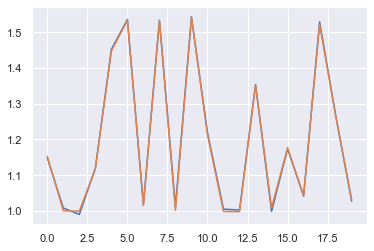

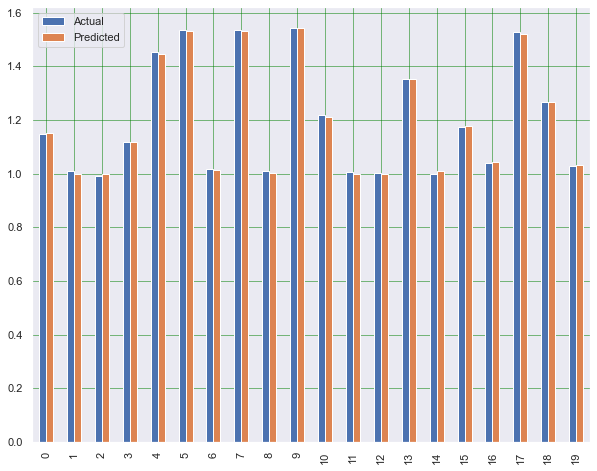

Mean Absolute Percentage Error: 0.5305293614619568
Mean Absolute Error: 0.006440748043728729
Mean Squared Error: 7.490403241425795e-05
Root Mean Squared Error: 0.008654711573140838
Accuracy: 99.46947063853804
 
 
---------------------------------------------
 
 
USD vs CHF:Swiss Franc
 
 
      Actual  Predicted
0   1.313095   1.311374
1   1.077316   1.072977
2   0.918964   0.923637
3   1.226414   1.226418
4   1.652956   1.659366
5   1.556718   1.560848
6   0.987396   0.986149
7   1.768217   1.759527
8   1.082748   1.076345
9   1.652445   1.657936
10  1.258921   1.264492
11  1.117970   1.121804
12  0.914706   0.917211
13  1.029584   1.025883
14  0.918828   0.932161
15  1.250679   1.241631
16  1.053832   1.057375
17  1.782077   1.774233
18  0.962663   0.973162
19  1.015625   1.036374


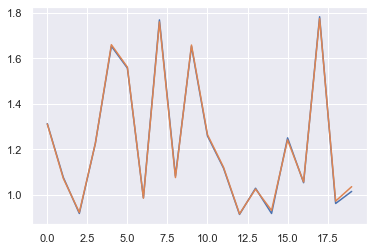

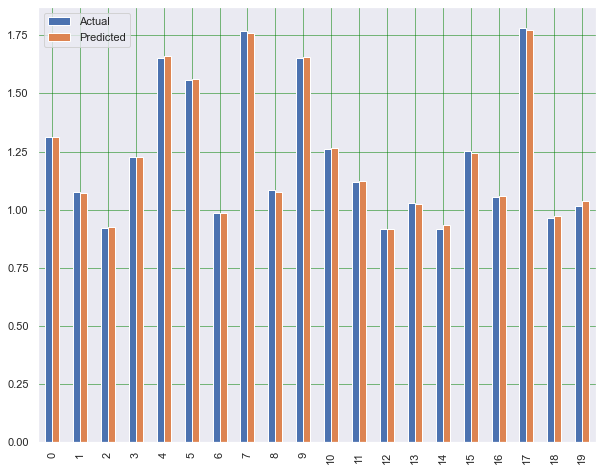

Mean Absolute Percentage Error: 0.6110340268838015
Mean Absolute Error: 0.006972652647600631
Mean Squared Error: 0.00010306915729824688
Root Mean Squared Error: 0.010152298128908886
Accuracy: 99.3889659731162
 
 
---------------------------------------------
 
 
USD vs JPY:Japanese Yen
 
 
        Actual   Predicted
0   118.661053  117.883125
1    93.080626   93.931099
2    81.448102   80.923798
3   114.816831  114.819481
4   107.331620  108.379333
5   124.674913  123.918076
6    83.329670   82.777733
7   108.292852  109.410881
8    93.982635   93.914734
9   119.441161  117.636703
10  111.521072  110.857147
11  109.795808  110.908470
12   80.862082   81.485001
13  117.386309  117.326889
14   76.972233   78.003822
15  120.406422  119.305931
16   85.772326   85.181732
17  123.190770  122.010544
18  109.743415  110.776169
19   92.393998   93.498375


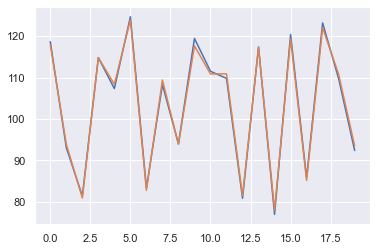

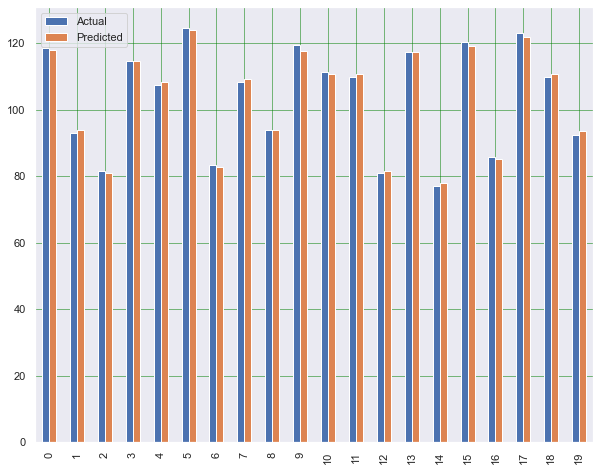

Mean Absolute Percentage Error: 0.6134602703637774
Mean Absolute Error: 0.6489328880707218
Mean Squared Error: 0.7142297580749002
Root Mean Squared Error: 0.8451211499394038
Accuracy: 99.38653972963623
 
 
---------------------------------------------
 
 
USD vs NZD:New Zealand Dollar
 
 
      Actual  Predicted
0   1.520421   1.502737
1   1.424113   1.426615
2   1.222256   1.222771
3   1.576495   1.579131
4   2.041440   2.047206
5   2.047257   2.040016
6   1.287975   1.299742
7   2.498843   2.484223
8   1.394866   1.383109
9   2.314562   2.344800
10  1.443485   1.449087
11  1.311580   1.295146
12  1.220699   1.224325
13  1.452178   1.461833
14  1.213313   1.230497
15  1.449779   1.446147
16  1.410266   1.384982
17  2.416385   2.408922
18  1.364845   1.360434
19  1.348706   1.370657


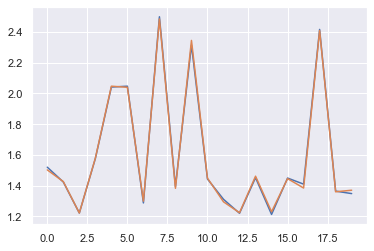

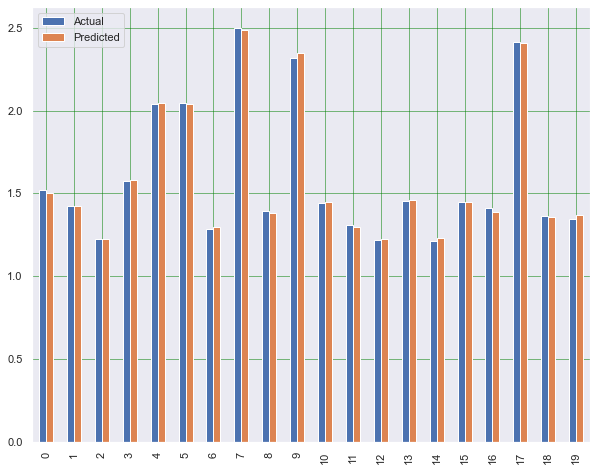

Mean Absolute Percentage Error: 0.764159581997171
Mean Absolute Error: 0.011842414883202645
Mean Squared Error: 0.0002598694297381044
Root Mean Squared Error: 0.016120466176202983
Accuracy: 99.23584041800282
 
 
---------------------------------------------
 
 


In [37]:
xgb_model(features_lagged)

## Support Vector Regression:

In [38]:
def svr_algorithm(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values
        y = dataset[col].values
        
        sc_x = MinMaxScaler()
        x = sc_x.fit_transform(x)
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

        svr_model = SVR(kernel='poly')
        
        print('USD vs', col)
        print(' \n ')
        
        
        svr_model.fit(x_train, y_train)
        y_pred = svr_model.predict(x_test)
        
        pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df_head = pred_df.head(20)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()
        
        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Percentage Error:', mape)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('Accuracy:', accuracy)
        
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

USD vs EUR:Euro
 
 
      Actual  Predicted
0   0.842105   0.802730
1   0.752106   0.762171
2   0.763767   0.736853
3   0.777786   0.774767
4   1.028278   0.985085
5   1.057194   1.055456
6   0.732762   0.718535
7   1.156604   1.195528
8   0.755002   0.756121
9   1.074691   1.095699
10  0.807363   0.798270
11  0.678380   0.706602
12  0.761557   0.739292
13  0.957396   0.915947
14  0.760746   0.748513
15  0.775615   0.785370
16  0.781311   0.748428
17  1.165365   1.205181
18  0.852442   0.860024
19  0.688326   0.759612


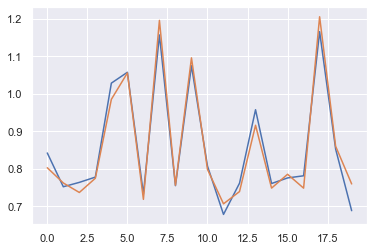

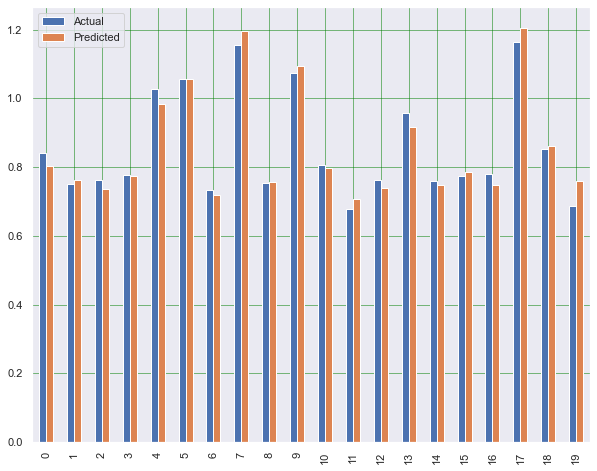

Mean Absolute Percentage Error: 3.7780422840140773
Mean Absolute Error: 0.03156569077203678
Mean Squared Error: 0.001524351091822832
Root Mean Squared Error: 0.03904293907767232
Accuracy: 96.22195771598592
 
 
---------------------------------------------
 
 
USD vs GBP:Pound Sterling
 
 
      Actual  Predicted
0   0.574989   0.600018
1   0.658093   0.610699
2   0.625640   0.630062
3   0.525161   0.590097
4   0.631362   0.599233
5   0.684322   0.611894
6   0.624460   0.607949
7   0.688873   0.622648
8   0.657456   0.615754
9   0.680279   0.614268
10  0.561602   0.589054
11  0.484974   0.576568
12  0.629008   0.627477
13  0.816659   0.742077
14  0.636630   0.633345
15  0.513185   0.597157
16  0.641613   0.612424
17  0.713670   0.628860
18  0.770079   0.713061
19  0.618736   0.607111


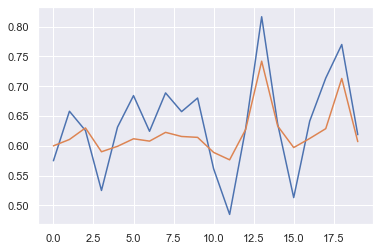

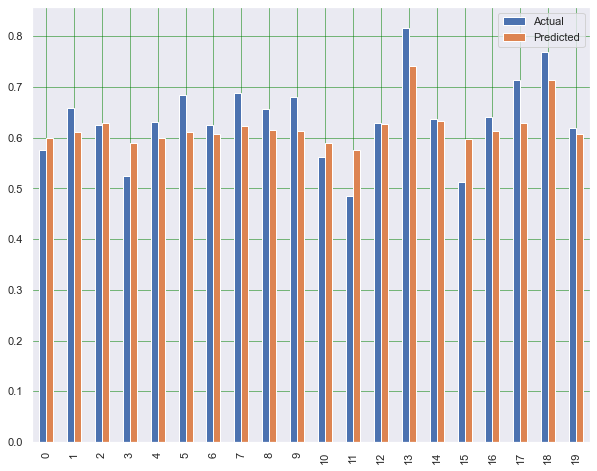

Mean Absolute Percentage Error: 6.185113387565009
Mean Absolute Error: 0.03791383948550847
Mean Squared Error: 0.002196664618862638
Root Mean Squared Error: 0.04686858882943498
Accuracy: 93.81488661243499
 
 
---------------------------------------------
 
 
USD vs AUD:Australian Dollar
 
 
      Actual  Predicted
0   1.361011   1.365934
1   1.082581   1.179779
2   0.964485   0.965493
3   1.299370   1.361809
4   1.640308   1.628247
5   1.753145   1.766435
6   1.012091   1.079695
7   1.894518   1.966532
8   1.082899   1.162191
9   1.914240   1.845034
10  1.297352   1.374928
11  1.142595   1.203807
12  0.970452   0.974088
13  1.391288   1.466964
14  0.937695   0.976400
15  1.283177   1.330850
16  1.115712   1.177483
17  1.916327   1.982547
18  1.268349   1.245142
19  1.073307   1.173876


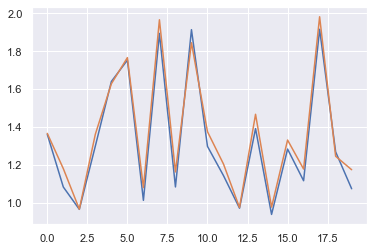

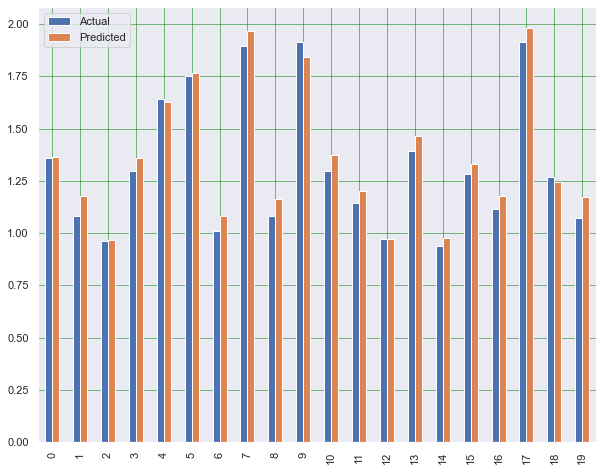

Mean Absolute Percentage Error: 3.680710896961243
Mean Absolute Error: 0.04631778749314407
Mean Squared Error: 0.002859914936794894
Root Mean Squared Error: 0.05347817252669442
Accuracy: 96.31928910303876
 
 
---------------------------------------------
 
 
USD vs CAD:Canadian Dollar
 
 
      Actual  Predicted
0   1.148632   1.224698
1   1.008348   1.097826
2   0.990300   1.008409
3   1.119312   1.155700
4   1.452237   1.427859
5   1.535786   1.513907
6   1.018172   1.048610
7   1.533773   1.516900
8   1.011854   1.087118
9   1.543471   1.553031
10  1.219118   1.212956
11  1.005020   1.031640
12  1.002665   1.013934
13  1.353375   1.427276
14  0.998783   1.018543
15  1.173970   1.199597
16  1.041409   1.094815
17  1.529192   1.593613
18  1.268008   1.251677
19  1.027533   1.108418


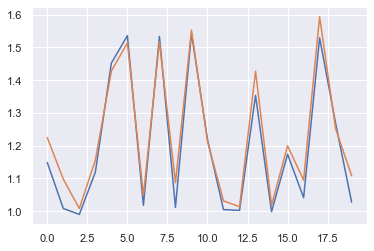

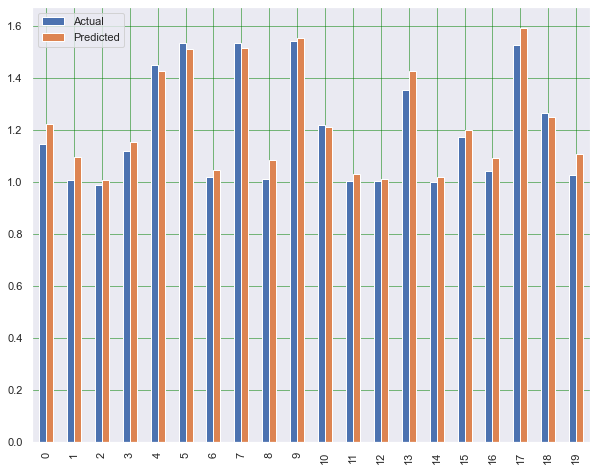

Mean Absolute Percentage Error: 3.2534557174622365
Mean Absolute Error: 0.03937844933412875
Mean Squared Error: 0.002213005066042397
Root Mean Squared Error: 0.04704258779066472
Accuracy: 96.74654428253777
 
 
---------------------------------------------
 
 
USD vs CHF:Swiss Franc
 
 
      Actual  Predicted
0   1.313095   1.224048
1   1.077316   1.101957
2   0.918964   0.889771
3   1.226414   1.186408
4   1.652956   1.611106
5   1.556718   1.572144
6   0.987396   1.032634
7   1.768217   1.851464
8   1.082748   1.091139
9   1.652445   1.690190
10  1.258921   1.249671
11  1.117970   1.113332
12  0.914706   0.893060
13  1.029584   1.094024
14  0.918828   0.911064
15  1.250679   1.195636
16  1.053832   1.093108
17  1.782077   1.815586
18  0.962663   0.983603
19  1.015625   1.102420


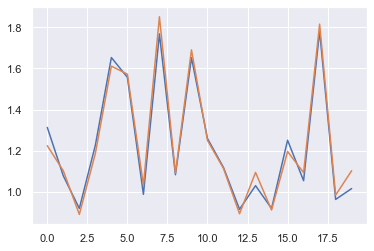

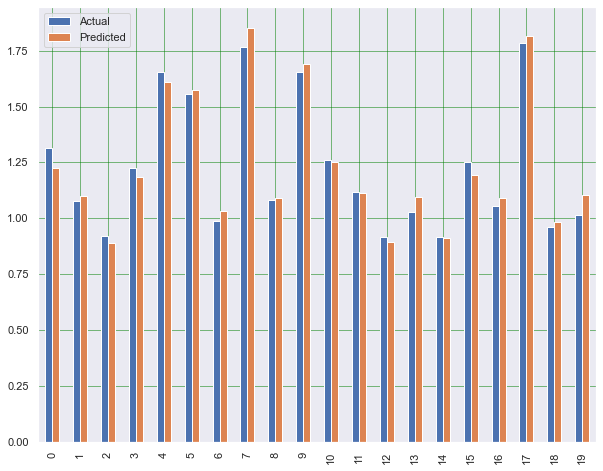

Mean Absolute Percentage Error: 4.156501886593329
Mean Absolute Error: 0.045847508778022274
Mean Squared Error: 0.002790446229724422
Root Mean Squared Error: 0.05282467444030699
Accuracy: 95.84349811340667
 
 
---------------------------------------------
 
 
USD vs JPY:Japanese Yen
 
 
        Actual   Predicted
0   118.661053  117.629816
1    93.080626   93.290894
2    81.448102   81.053011
3   114.816831  114.959653
4   107.331620  110.705226
5   124.674913  123.372971
6    83.329670   84.749144
7   108.292852  108.126253
8    93.982635   93.490661
9   119.441161  117.476714
10  111.521072  110.754144
11  109.795808  111.101226
12   80.862082   81.697874
13  117.386309  118.720160
14   76.972233   77.869640
15  120.406422  117.825764
16   85.772326   86.688324
17  123.190770  122.023632
18  109.743415  110.816141
19   92.393998   93.697963


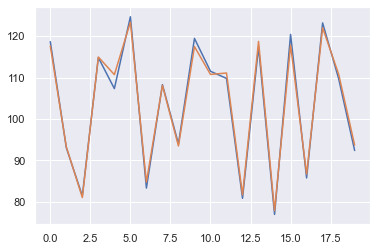

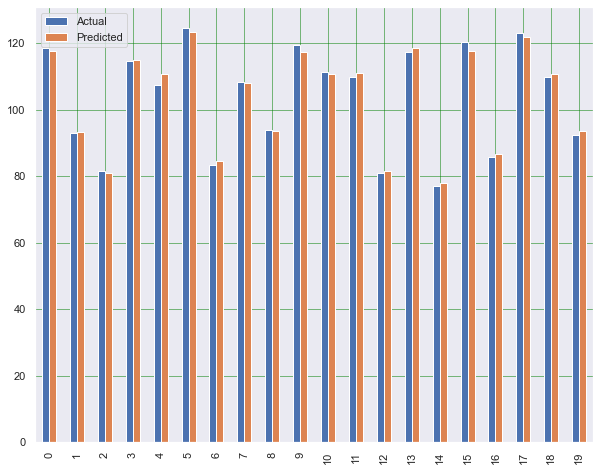

Mean Absolute Percentage Error: 0.9201986348086348
Mean Absolute Error: 0.961113397236936
Mean Squared Error: 1.65176526375936
Root Mean Squared Error: 1.2852102021690304
Accuracy: 99.07980136519137
 
 
---------------------------------------------
 
 
USD vs NZD:New Zealand Dollar
 
 
      Actual  Predicted
0   1.520421   1.519648
1   1.424113   1.463164
2   1.222256   1.236878
3   1.576495   1.529440
4   2.041440   2.012850
5   2.047257   2.061317
6   1.287975   1.340747
7   2.498843   2.556760
8   1.394866   1.445120
9   2.314562   2.287606
10  1.443485   1.491949
11  1.311580   1.369187
12  1.220699   1.250626
13  1.452178   1.503967
14  1.213313   1.257090
15  1.449779   1.454275
16  1.410266   1.444973
17  2.416385   2.464107
18  1.364845   1.340810
19  1.348706   1.424673


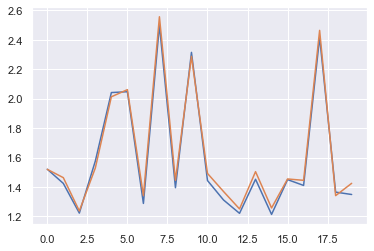

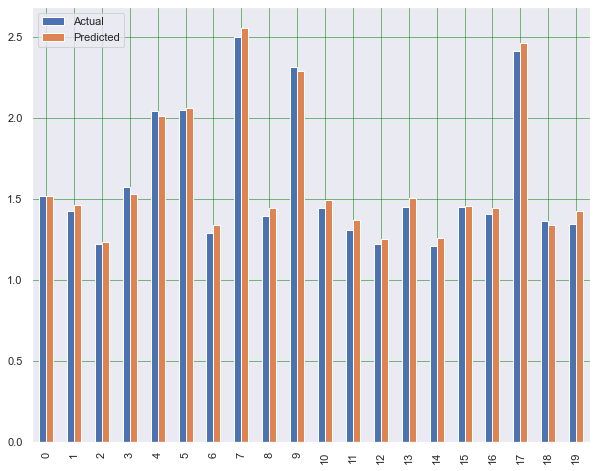

Mean Absolute Percentage Error: 2.558758839561989
Mean Absolute Error: 0.038558379547224984
Mean Squared Error: 0.002195516715408217
Root Mean Squared Error: 0.0468563412507658
Accuracy: 97.44124116043801
 
 
---------------------------------------------
 
 


In [39]:
svr_algorithm(features_lagged)

## Artificial Neural Network:

In [42]:
def ann_algorithm(dataset):
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values    
        y = dataset[col].values

        min_max_scaler = MinMaxScaler()
        x_scale = min_max_scaler.fit_transform(x)
        x_scale
        
        x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=0)
        
        print('USD vs', col)
        print(' \n ')
        
        ann_model = Sequential()
        ann_model.add(Dense(18, input_dim=39, activation='relu'))
        ann_model.add(Dense(12, activation='relu'))
        ann_model.add(Dense(1))
        ann_model.compile(loss='mean_squared_error', optimizer='adam')
        #ann_model.compile(loss='mean_squared_error', optimizer='adam')
        #early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
        ann_model.fit(x_train, y_train, epochs=10, batch_size=16, verbose = 0, validation_split=0.2, shuffle=False)
        
        y_pred = ann_model.predict(x_test)
        #y_train_pred_nn = nn_model.predict(x_train)

 

        #pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        pred_df = pd.DataFrame(pd.concat({'Actual': pd.DataFrame(y_test), 'Predicted': pd.DataFrame(y_pred)}, ignore_index=True, axis=1))

 

        pred_df_head = (pred_df.head(20))
        pred_df_head = pred_df_head.rename({0 : 'Actual', 1:'Predicted'}, axis =1)
        print(pred_df_head)
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()
        
        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape

 

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        
        print(' \n ')
        print('---------------------------------------------')
        
        print('Mean Absolute Percentage Error:', mape)
        print('Accuracy:', accuracy)
        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')

In [ ]:
ann_algorithm(features_lagged)

## LSTM:

In [ ]:
def lstm_algorithm(dataset):
    
    for col in dataset.columns[13:20]:
        x = dataset[dataset.columns.difference([col, col + '_lags'])].values    
        y = dataset[col].values
        
        min_max_scaler = MinMaxScaler()
        x_scale = min_max_scaler.fit_transform(x)
        x_scale
        
        x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.25, random_state=0)
 
        #LSTM expects the input data in a specific 3D format of sample size, time steps, no. of input features
    
        x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
        x_test = x_test.reshape(x_test.shape[0],1, x_test.shape[1])

        model = Sequential()

        model.add(LSTM(units=72, dropout=0.2, recurrent_dropout=0.2, 
                       input_shape=(x_train.shape[1], x_train.shape[2]), 
                       return_sequences=True))

        model.add(LSTM(units=72, dropout=0.2, recurrent_dropout=0.2, 
                       return_sequences=False))

 


        model.add(Dense(1, activation='relu'))
        model.compile(loss='mean_squared_error', optimizer='adam' )
        model.summary()
        # fit network

        history = model.fit(x_train, y_train, epochs=1, batch_size=16, validation_data=(x_test, y_test), verbose=2, shuffle=True)
        
        y_pred = model.predict(x_test)
        
        x_test=x_test.reshape((x_test.shape[0],x_test.shape[2])) 
        
        pred_df = pd.DataFrame(pd.concat({'Actual': pd.DataFrame(y_test), 'Predicted': pd.DataFrame(y_pred)}, ignore_index=True, axis=1))
        pred_df_head = pred_df.head(20)
        pred_df_head = pred_df_head.rename({0 : 'Actual', 1:'Predicted'}, axis =1)
        print(pred_df_head)
        
        
        plt.plot(pred_df_head)
        
        pred_df_head.plot(kind='bar',figsize=(10,8))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        plt.close()
        
        error = abs(y_pred - y_test)
        mape = np.mean(100 * (error / y_test))
        accuracy = 100 - mape
        
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        print('Mean Absolute Percentage Error:', mape)
        print('Accuracy:', accuracy)

        print(' \n ')
        print('---------------------------------------------')
        print(' \n ')
      

In [ ]:
lstm_algorithm(features_lagged)